# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [344]:
def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=0.5, color='green')
    vis.show()

In [345]:
def draw_points_equal(points):
    vis = Visualizer()
    vis.add_point(points, s=0.5, color='green')
    vis.axis_equal()
    vis.show()

In [346]:
def draw_line(points_left, points_mid, points_right):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='grey')
    vis.add_point(points_left, s=2, color=['green'])
    vis.add_point(points_mid, s=2, color=['purple'])
    vis.add_point(points_right, s=2, color=['orange'])
    #na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.
    vis.show()

In [347]:
def draw_line_equal(points_left, points_mid, points_right):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='grey')
    vis.add_point(points_left, s=1, color=['green'])
    vis.add_point(points_mid, s=1, color=['purple'])
    vis.add_point(points_right, s=1, color=['orange'])
    #na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.
    vis.axis_equal()
    vis.show()

In [348]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='green')
    vis.add_point((6, 6), s=30, color='red')
    vis.add_point((7, 4), s=30, color='purple')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

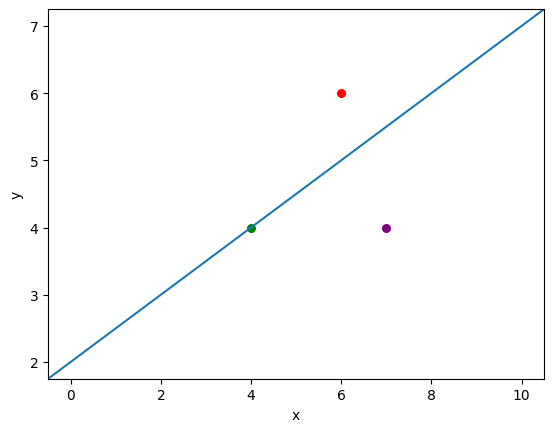

In [349]:
draw_example()

Do tego celu potrzebujesz wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_points```
 (Aby generować losowo liczby rzeczywiste bardzo przydatna może okazać się jakaś funckja biblioteczna)

In [350]:
def generate_uniform_points(left, right, n = 10 ** 5):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    return [(np.random.uniform(left,right),np.random.uniform(left,right)) for _ in range(n)]

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [351]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty

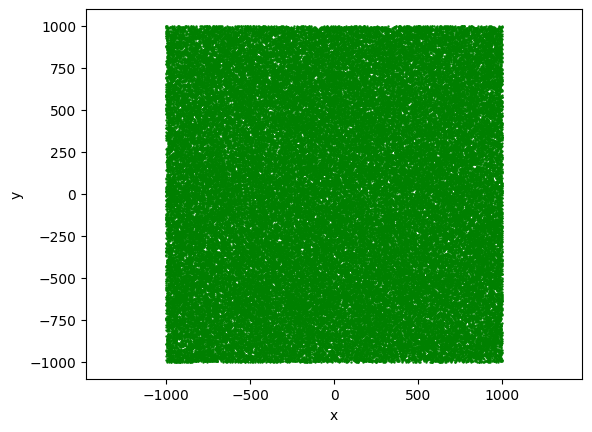

In [352]:
draw_points_equal(points_a)

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [353]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

Zwizualizuj wygenerowane punkty.

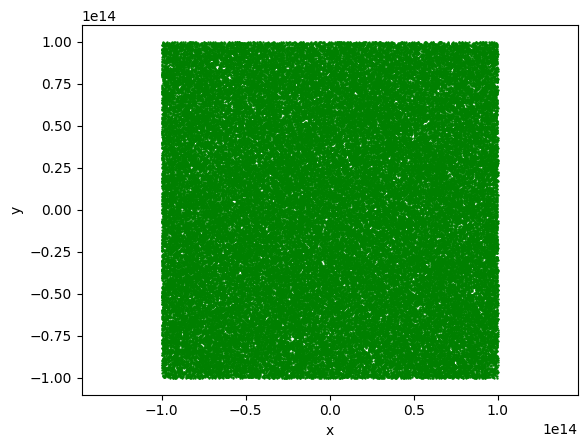

In [354]:
draw_points_equal(points_b)

Uzupełnij funkcję ```generate_circle_points```

Zastanów się w sposób generować punkty jednostajnie na okręgu.

In [355]:
def generate_circle_points(O, R, n = 1000):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu 
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    #można użyć postaci parametrycznej okregu gdzie x=Ox+R*cos(fi) i y=Oy+R*sin(fi)
    fi_arr=np.linspace(0,2*np.pi, n, endpoint=False)
    return [(O[0] + R * np.cos(fi), O[1] + R * np.sin(fi)) for fi in fi_arr]

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [356]:
points_c = generate_circle_points((0, 0), 100, 1000)

Zwizualizuj wygenerowane punkty.

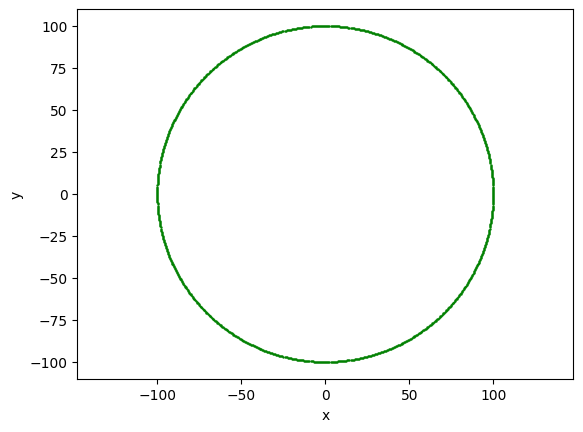

In [357]:
draw_points_equal(points_c)

Uzupełnij funkcję ```generate_collinear_points```.

In [358]:
def generate_points_on_line_2D(a, b, left =-1000, right =1000, n=1000):
    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na prostej ab
    :param a: krotka współrzędnych oznaczająca początek wektora tworzącego prostą
    :param b: krotka współrzędnych oznaczająca koniec wektora tworzącego prostą
    :param n: ilość generowanych punktów
    :param left: początek przedziału generowanych punktów
    :param right: koniec przedziału generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    x_coords = np.random.uniform(left, right, n)
    slope = (b[1] - a[1]) / (b[0] - a[0])
    y_coords = a[1] + slope * (x_coords - a[0])
    return [(x_coords[i], y_coords[i]) for i in range(n)]

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [359]:
points_d = generate_points_on_line_2D((-1.0, 0.0), (1.0,0.1),-1000,1000,1000)

Zwizualizuj wygenerowane punkty.

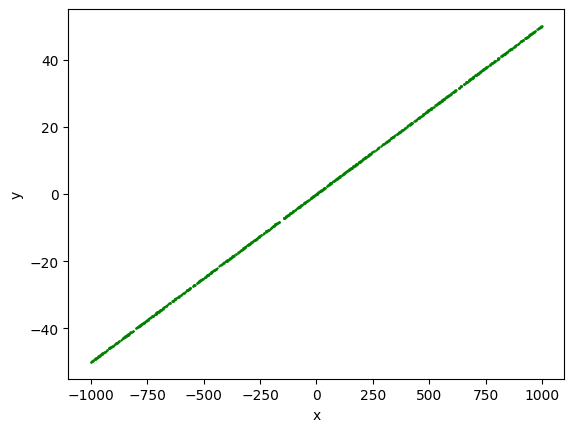

In [360]:
draw_points(points_d)

Przeprowadź test poprawności powyższych funkcji

In [361]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_points_on_line_2D)

Lab 1, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.016s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której stronie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ 
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

Uzupełnij funkcje ```mat_det_3x3```

In [362]:
def mat_det_3x3(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return a[0]*b[1]+a[1]*c[0]+b[0]*c[1]-b[1]*c[0]-a[0]*c[1]-a[1]*b[0]

Uzupełnij funkcję ```mat_det_3x3_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [363]:
def mat_det_3x3_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    matrix=[[a[0],a[1],1],[b[0],b[1],1],[c[0],c[1],1]]
    return np.linalg.det(matrix)

Uzupełnij funkcje ```mat_det_2x2```

In [364]:
def mat_det_2x2(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return (a[0]-c[0])*(b[1]-c[1])-(a[1]-c[1])*(b[0]-c[0])

Uzupełnij funkcję ```mat_det_2x2_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [365]:
def mat_det_2x2_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    matrix = [[a[0]-c[0],a[1]-c[1]],[b[0]-c[0],b[1]-c[1]]]
    return np.linalg.det(matrix)

Przetestujmy napisane powyżej funkcje.

In [366]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.000s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [367]:
def categorize_points(points, a, b, mat_det_func, eps):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostek
    """
    left=[]
    mid=[]
    right=[]
    for c in points:
        det=mat_det_func(a,b,c)
        if det>eps:
            left.append(c)
        elif det<-eps:
            right.append(c)
        else:
            mid.append(c)
        
    return left,mid,right

In [368]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.
Tolerancje $$\epsilon = 0, 10^{-14}, 10^{-12}, 10^{-10}, 10^{-8}$$ i w takiej też kolejności są prezentowane tj. Zestaw danych-Kolejny epsilon(od 0)-Metoda obliczania wyznacznika

ZBIÓR A

$$\epsilon = 0$$


100000 49802 0 50198


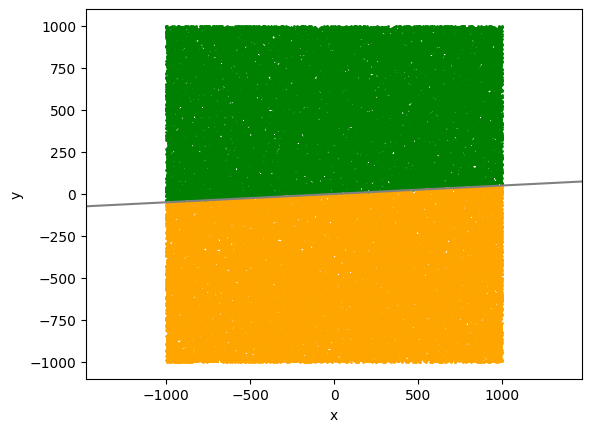

In [369]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 0)
draw_line_equal(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(len(points_a),len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

100000 49802 0 50198


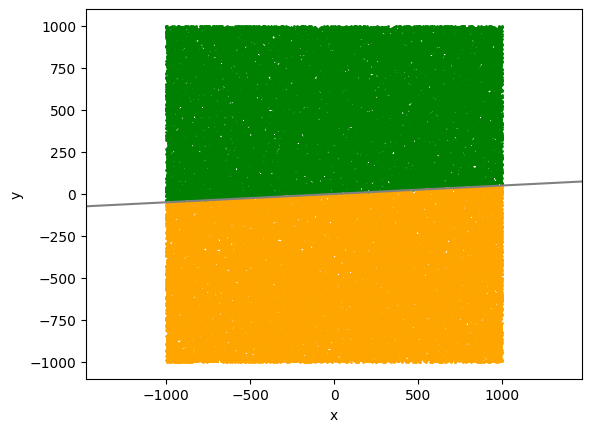

In [370]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3_lib, 0)
draw_line_equal(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(len(points_a),len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

100000 49802 0 50198


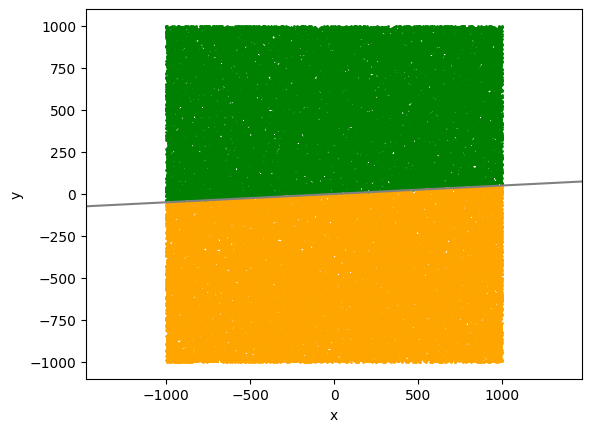

In [371]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2, 0)
draw_line_equal(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(len(points_a),len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

100000 49802 0 50198


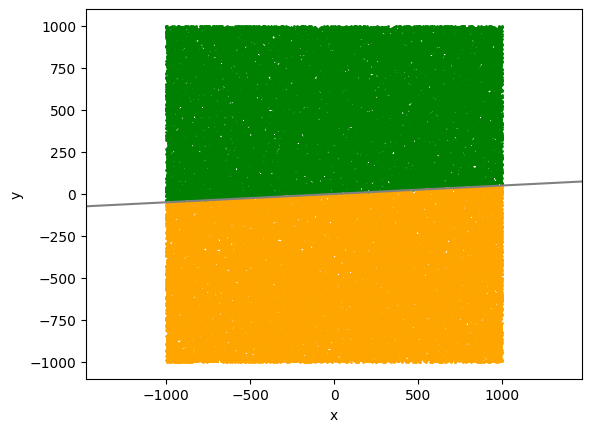

In [372]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 0)
draw_line_equal(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(len(points_a),len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

$$\epsilon = 10^{-14}$$


100000 49802 0 50198


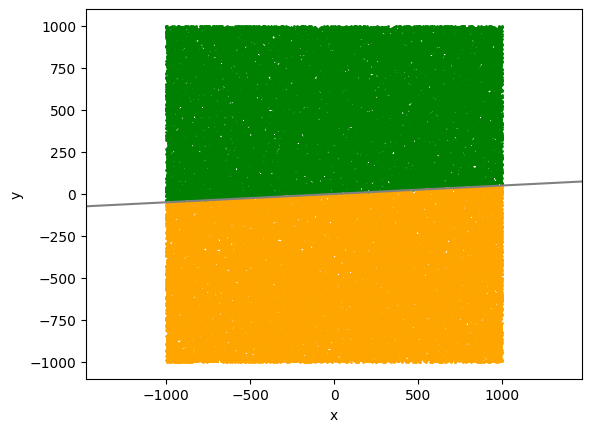

In [373]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -14)
draw_line_equal(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(len(points_a),len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

100000 49802 0 50198


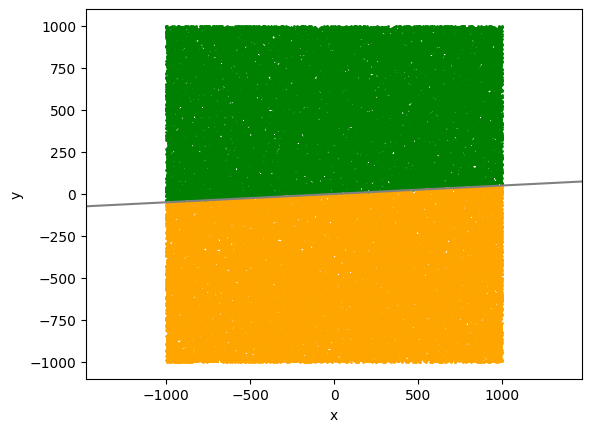

In [374]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3_lib, 10 ** -14)
draw_line_equal(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(len(points_a),len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

100000 49802 0 50198


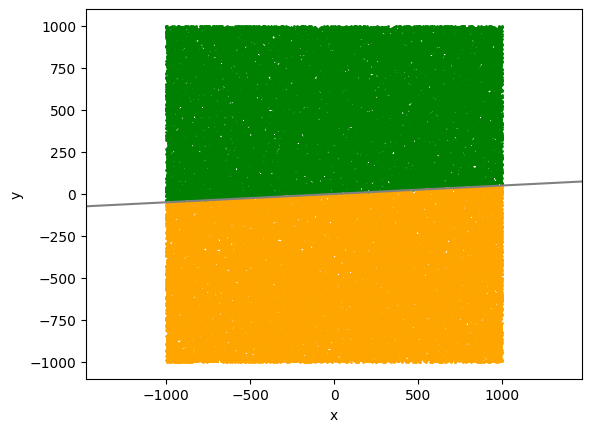

In [375]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2, 10 ** -14)
draw_line_equal(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(len(points_a),len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

100000 49802 0 50198


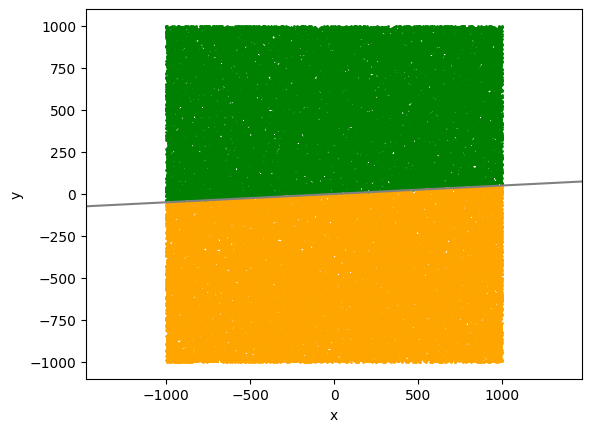

In [376]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10 ** -14)
draw_line_equal(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(len(points_a),len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

$$\epsilon = 10^{-12}$$


100000 49802 0 50198


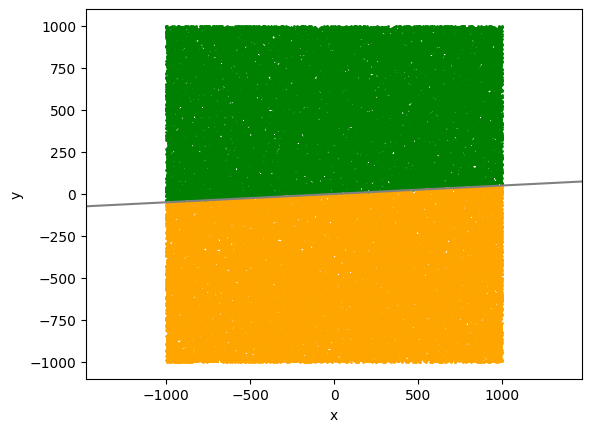

In [377]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -12)
draw_line_equal(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(len(points_a),len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

100000 49802 0 50198


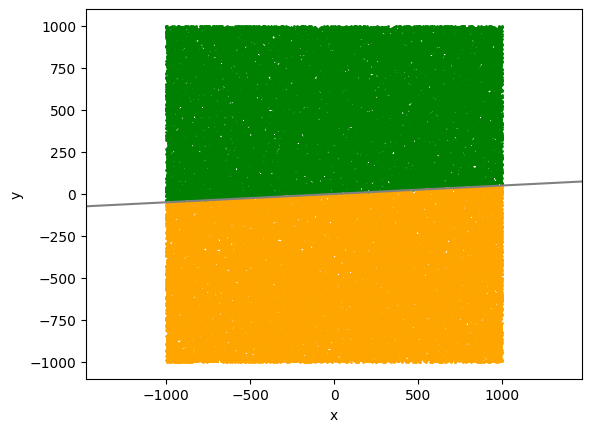

In [378]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3_lib, 10 ** -12)
draw_line_equal(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(len(points_a),len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

100000 49802 0 50198


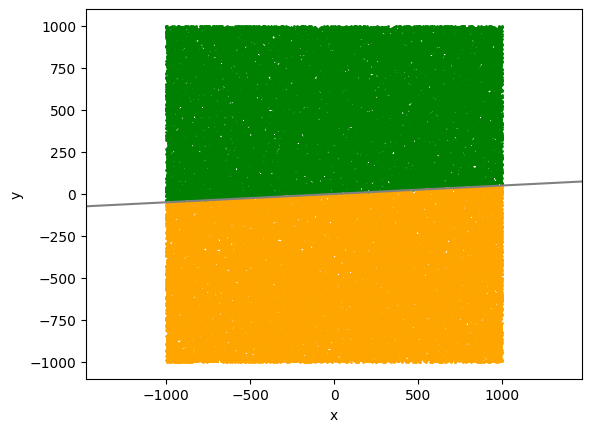

In [379]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2, 10 ** -12)
draw_line_equal(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(len(points_a),len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

100000 49802 0 50198


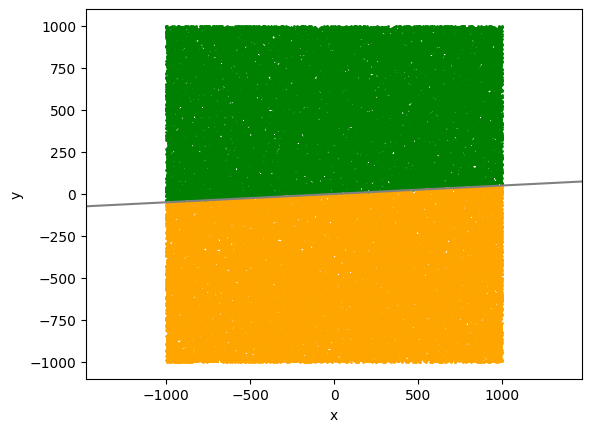

In [380]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10 ** -12)
draw_line_equal(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(len(points_a),len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

$$\epsilon = 10^{-10}$$


100000 49802 0 50198


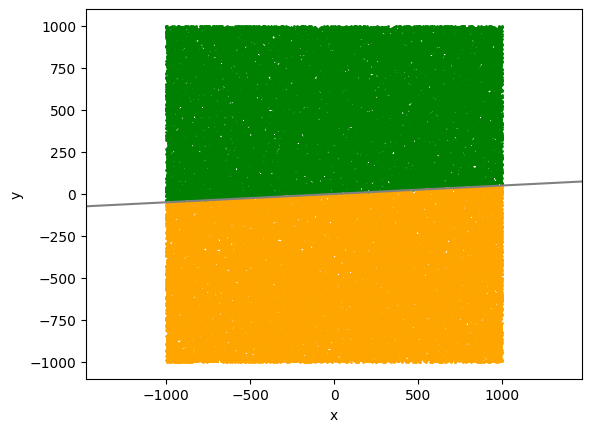

In [381]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -10)
draw_line_equal(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(len(points_a),len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

100000 49802 0 50198


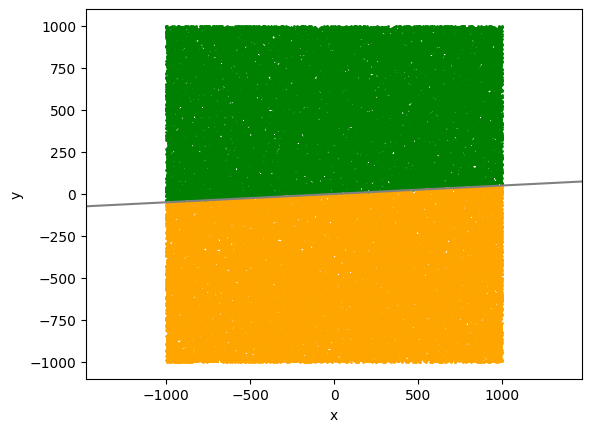

In [382]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3_lib, 10 ** -10)
draw_line_equal(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(len(points_a),len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

100000 49802 0 50198


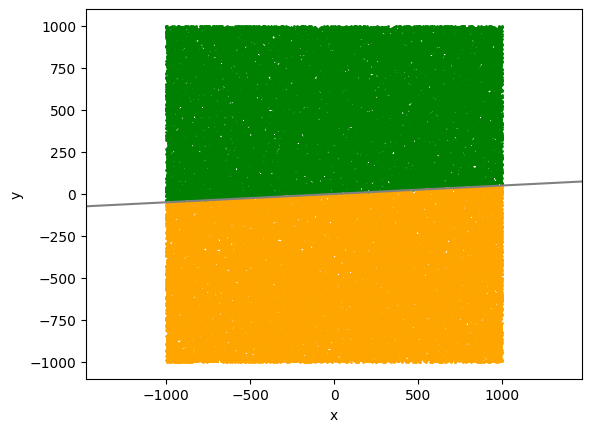

In [383]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2, 10 ** -10)
draw_line_equal(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(len(points_a),len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

100000 49802 0 50198


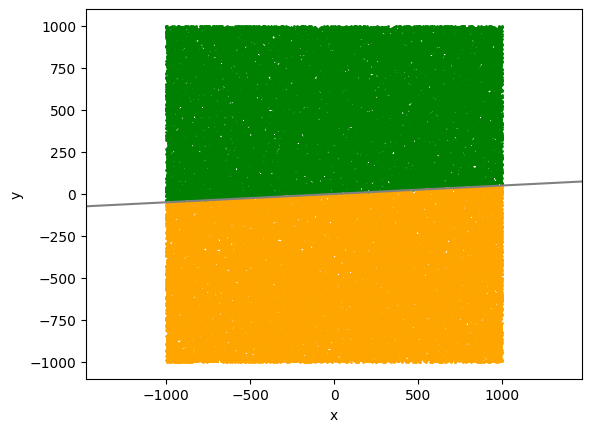

In [384]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10 ** -10)
draw_line_equal(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(len(points_a),len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

$$\epsilon = 10^{-8}$$


100000 49802 0 50198


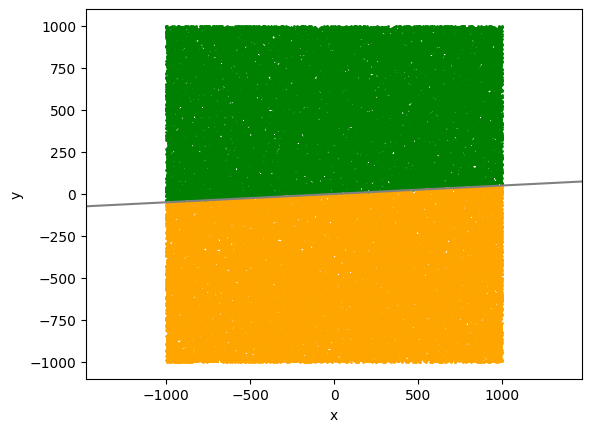

In [385]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -8)
draw_line_equal(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(len(points_a),len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

100000 49802 0 50198


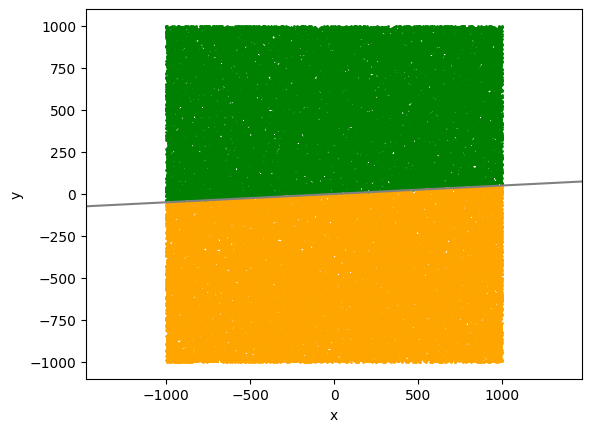

In [386]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3_lib, 10 ** -8)
draw_line_equal(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(len(points_a),len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

100000 49802 0 50198


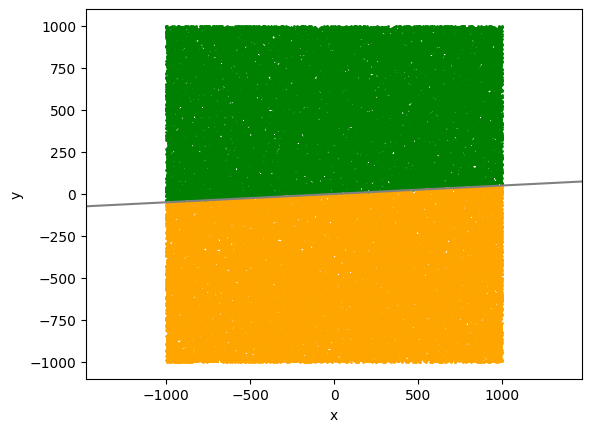

In [387]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2, 10 ** -8)
draw_line_equal(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(len(points_a),len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

100000 49802 0 50198


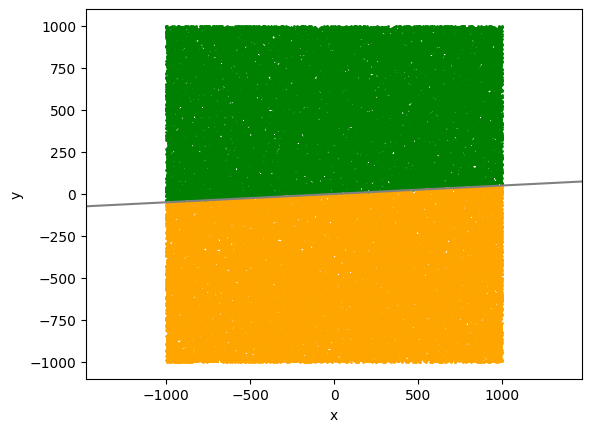

In [388]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10 ** -8)
draw_line_equal(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
print(len(points_a),len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right))

ZBIÓR B

$$\epsilon = 0$$


100000 49836 0 50164


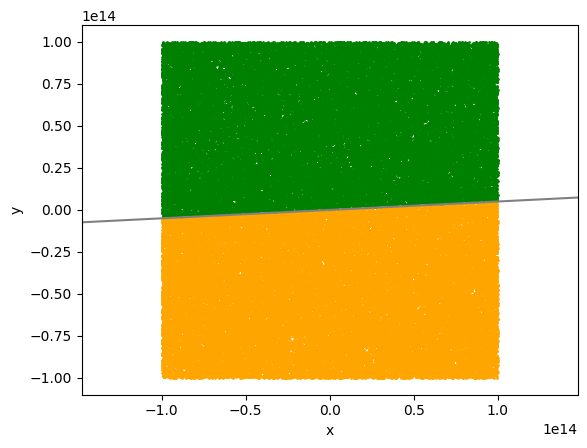

In [389]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3, 0)
draw_line_equal(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(len(points_b),len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))

100000 49836 0 50164


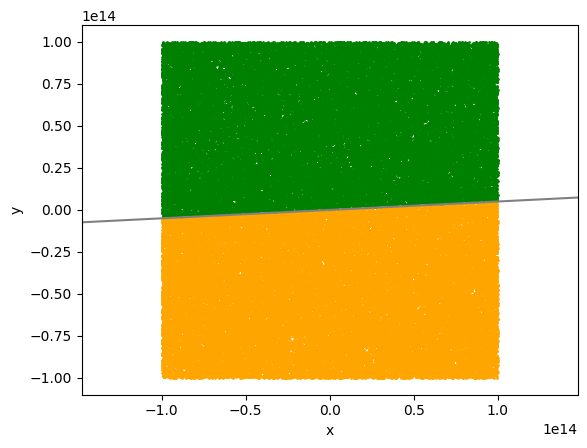

In [390]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 0)
draw_line_equal(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(len(points_b),len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))

100000 49835 2 50163


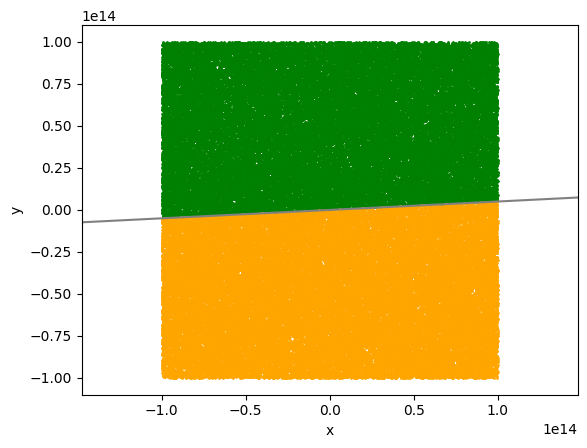

In [391]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2, 0)
draw_line_equal(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(len(points_b),len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))

100000 49834 4 50162


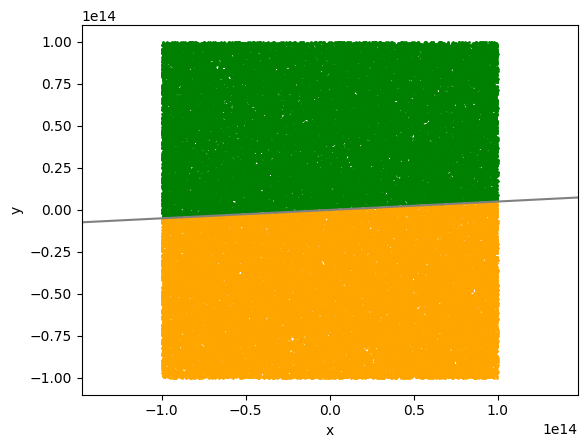

In [392]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2_lib, 0)
draw_line_equal(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(len(points_b),len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))

$$\epsilon = 10^{-14}$$


100000 49836 0 50164


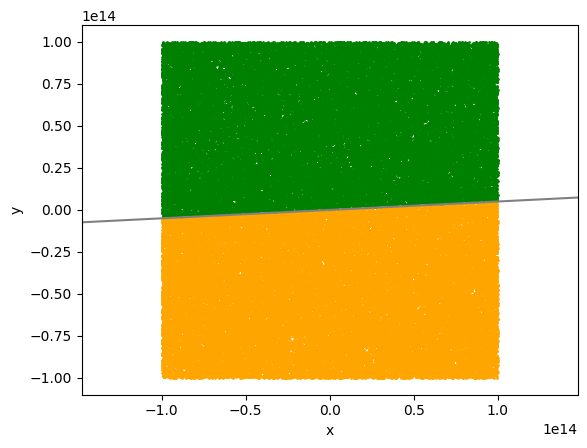

In [393]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3, 10 ** -14)
draw_line_equal(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(len(points_b),len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))

100000 49836 0 50164


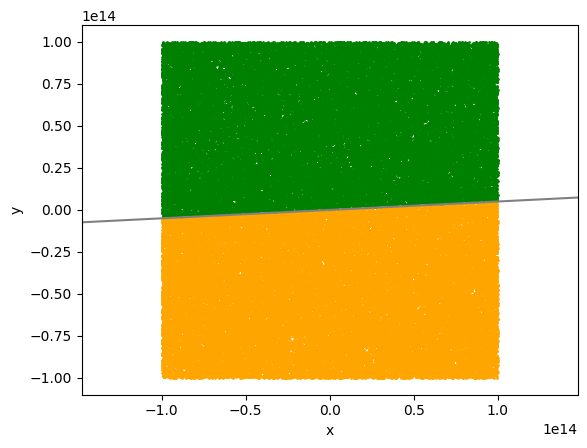

In [394]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -14)
draw_line_equal(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(len(points_b),len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))

100000 49835 2 50163


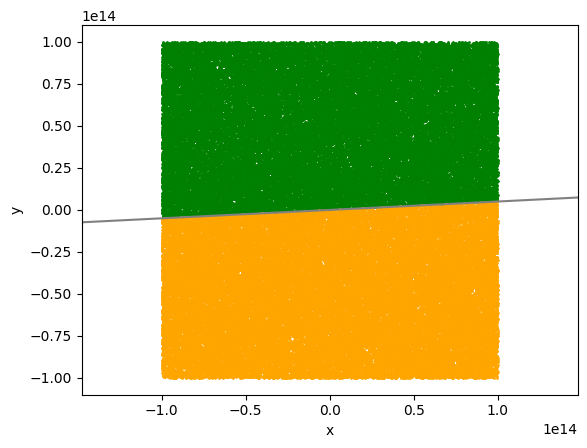

In [395]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2, 10 ** -14)
draw_line_equal(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(len(points_b),len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))

100000 49834 4 50162


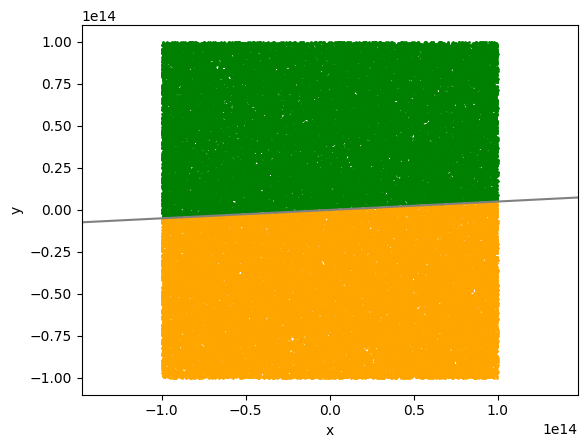

In [396]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2_lib, 10 ** -14)
draw_line_equal(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(len(points_b),len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))

$$\epsilon = 10^{-12}$$


100000 49836 0 50164


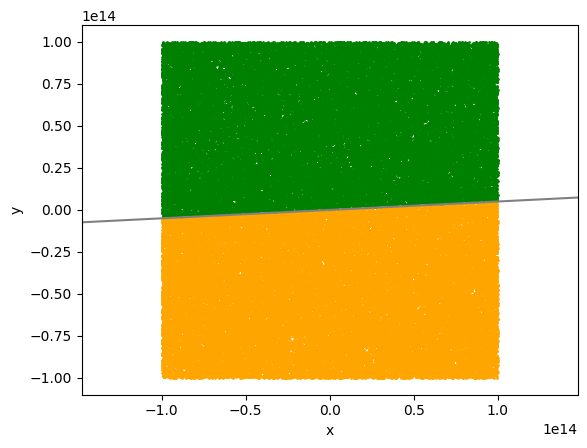

In [397]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3, 10 ** -12)
draw_line_equal(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(len(points_b),len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))

100000 49836 0 50164


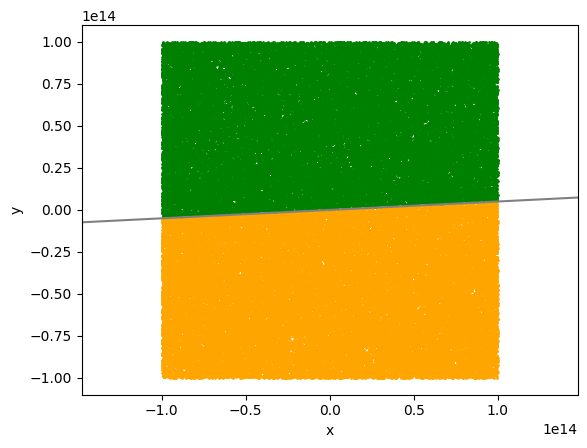

In [398]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -12)
draw_line_equal(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(len(points_b),len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))

100000 49835 2 50163


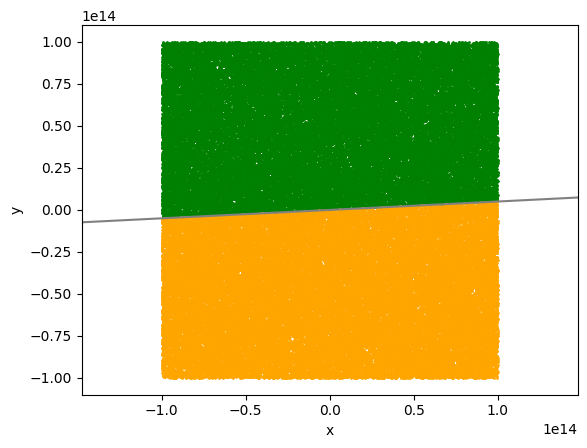

In [399]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2, 10 ** -12)
draw_line_equal(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(len(points_b),len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))

100000 49834 4 50162


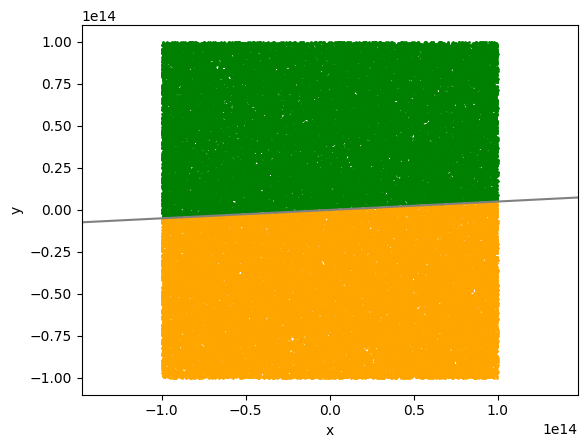

In [400]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2_lib, 10 ** -12)
draw_line_equal(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(len(points_b),len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))

$$\epsilon = 10^{-10}$$


100000 49836 0 50164


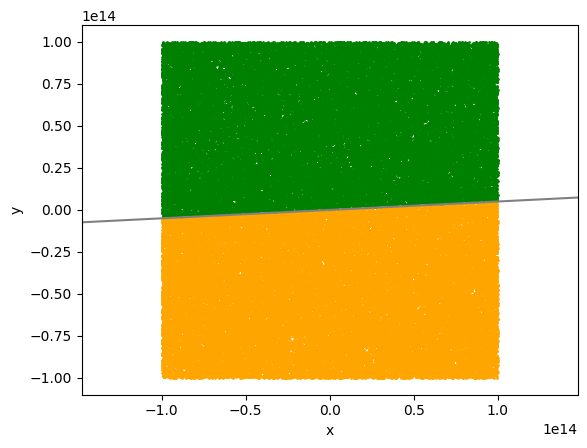

In [401]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3, 10 ** -10)
draw_line_equal(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(len(points_b),len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))

100000 49836 0 50164


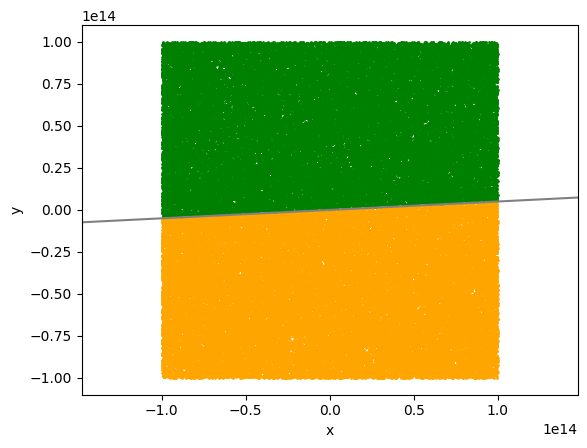

In [402]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -10)
draw_line_equal(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(len(points_b),len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))

100000 49835 2 50163
[(-97960596026523.36, -4885744900974.625), (-86922985351721.36, -4353852952769.9062)]


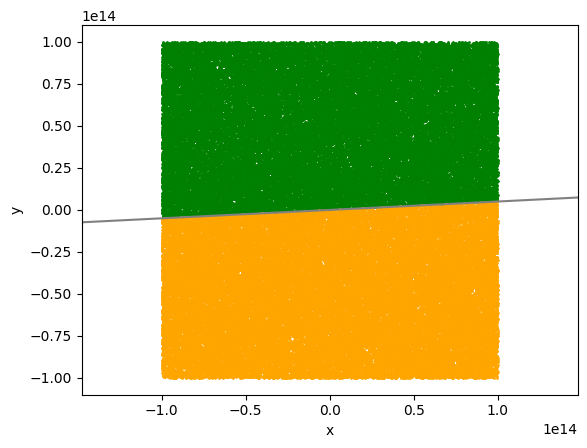

In [536]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2, 10 ** -10)
draw_line_equal(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(len(points_b),len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))
print(classified_points_b_mid)

100000 49834 4 50162
[(-97960596026523.36, -4885744900974.625), (-88326024737460.94, -4410331996867.9375), (-86922985351721.36, -4353852952769.9062), (93696284131929.0, 4674951251163.5)]


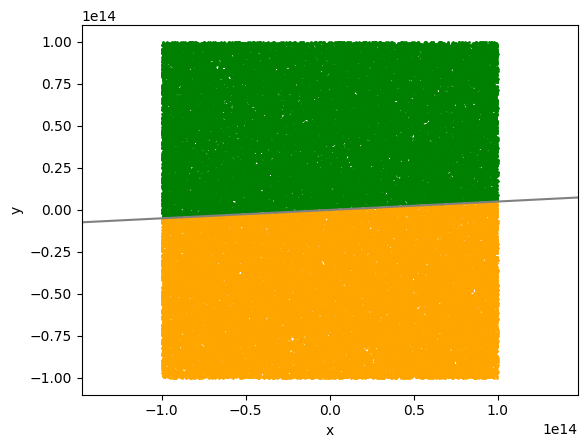

In [537]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2_lib, 10 ** -10)
draw_line_equal(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(len(points_b),len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))
print(classified_points_b_mid)

$$\epsilon = 10^{-8}$$


100000 49836 0 50164


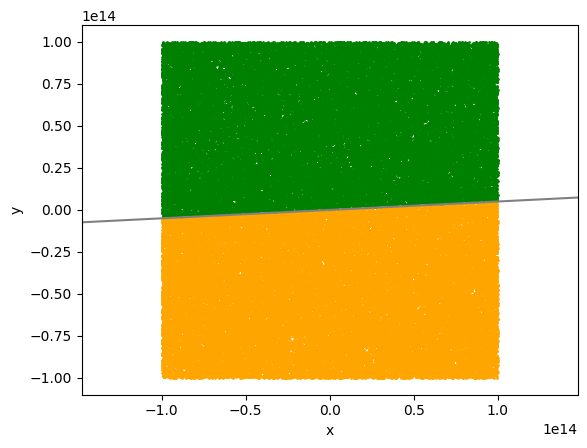

In [405]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3, 10 ** -8)
draw_line_equal(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(len(points_b),len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))

100000 49836 0 50164


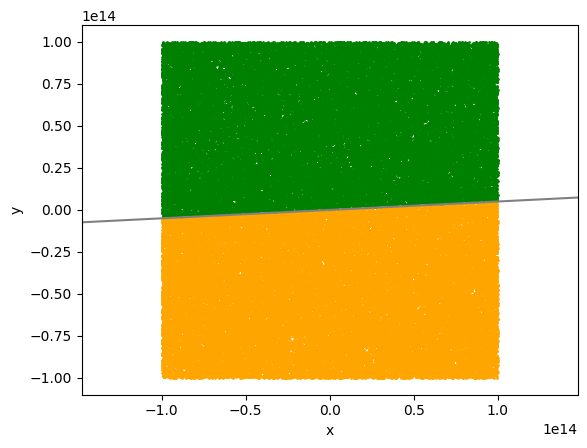

In [406]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -8)
draw_line_equal(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(len(points_b),len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))

100000 49835 2 50163


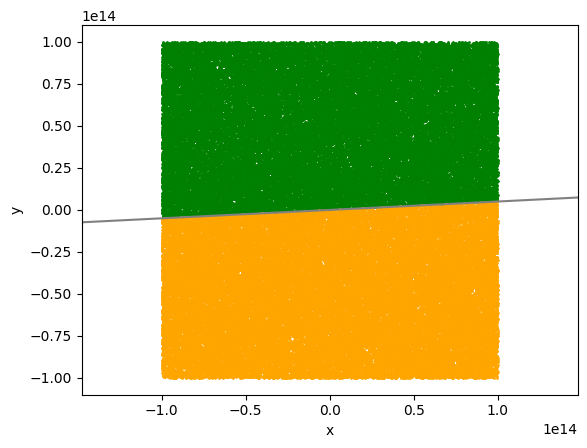

In [407]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2, 10 ** -8)
draw_line_equal(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(len(points_b),len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))

100000 49834 4 50162


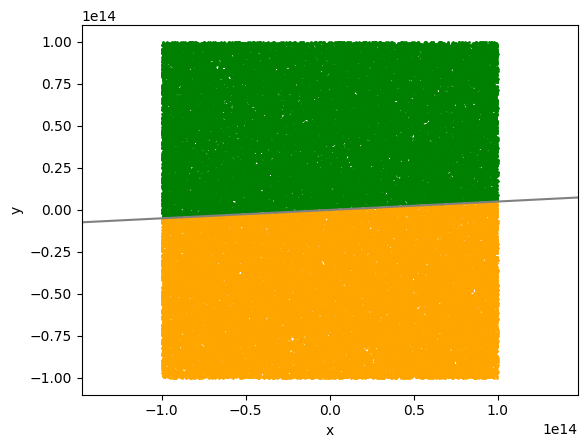

In [408]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2_lib, 10 ** -8)
draw_line_equal(classified_points_b_left, classified_points_b_mid, classified_points_b_right)
print(len(points_b),len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right))

ZBIÓR C

$$\epsilon = 0$$


1000 499 0 501


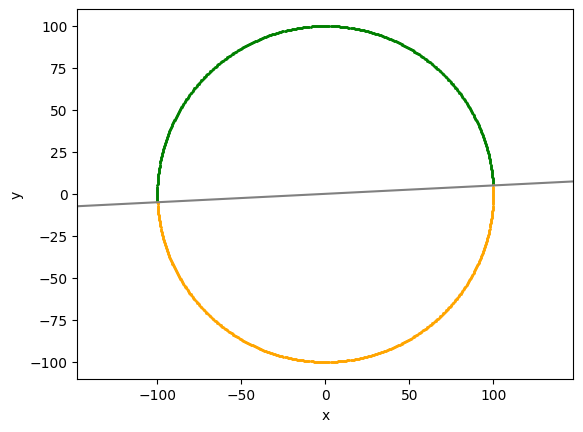

In [409]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3, 0)
draw_line_equal(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(len(points_c),len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

1000 499 0 501


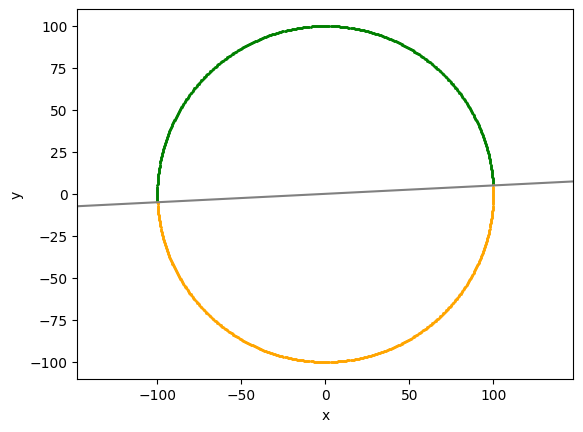

In [410]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3_lib, 0)
draw_line_equal(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(len(points_c),len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

1000 499 0 501


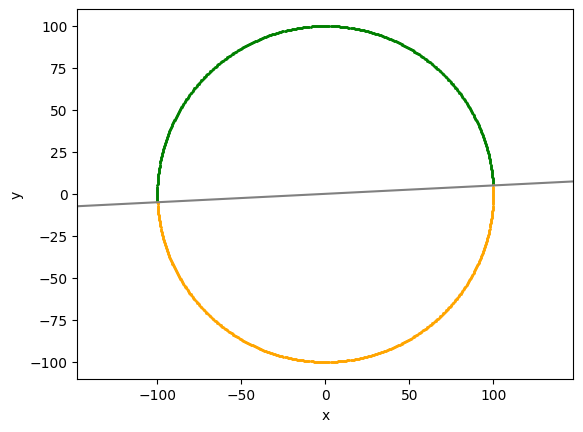

In [411]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 0)
draw_line_equal(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(len(points_c),len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

1000 499 0 501


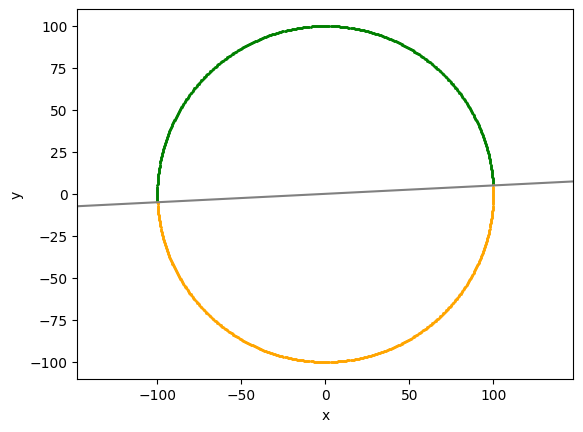

In [412]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2_lib, 0)
draw_line_equal(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(len(points_c),len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

$$\epsilon = 10^{-14}$$


1000 499 0 501


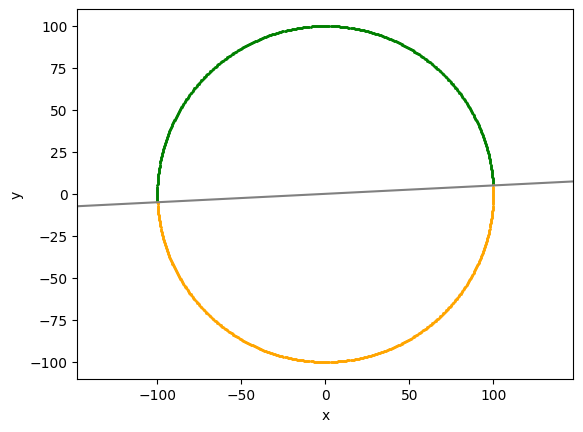

In [413]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3, 10 ** -14)
draw_line_equal(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(len(points_c),len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

1000 499 0 501


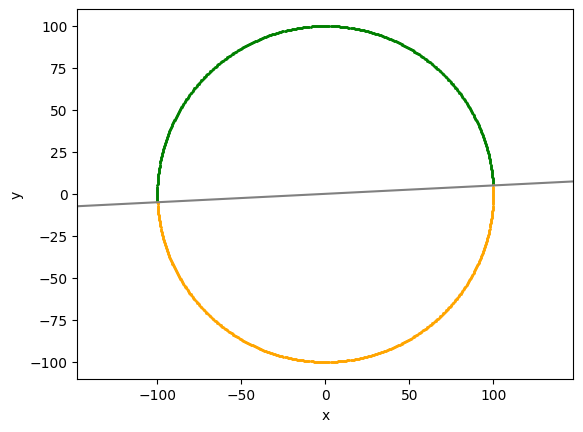

In [414]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3_lib, 10 ** -14)
draw_line_equal(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(len(points_c),len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

1000 499 0 501


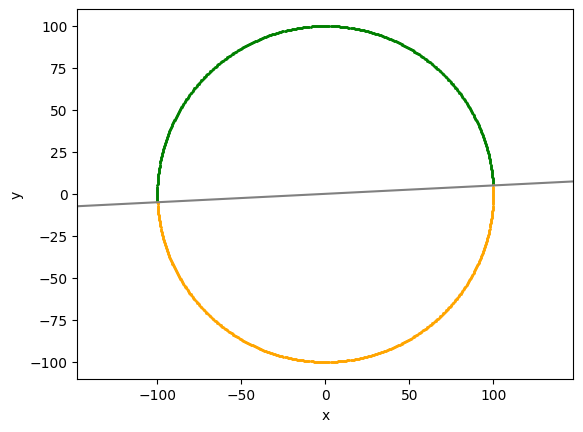

In [415]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -14)
draw_line_equal(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(len(points_c),len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

1000 499 0 501


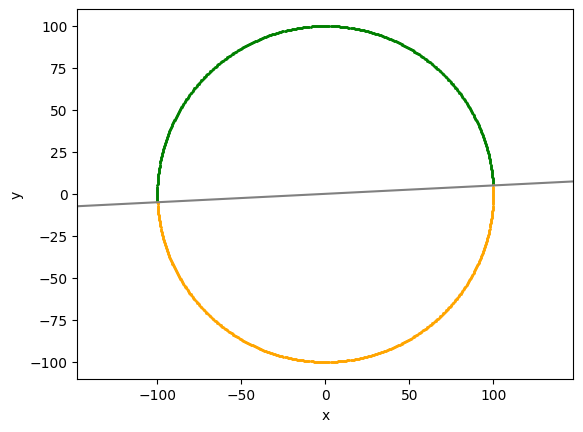

In [416]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2_lib, 10 ** -14)
draw_line_equal(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(len(points_c),len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

$$\epsilon = 10^{-12}$$


1000 499 0 501


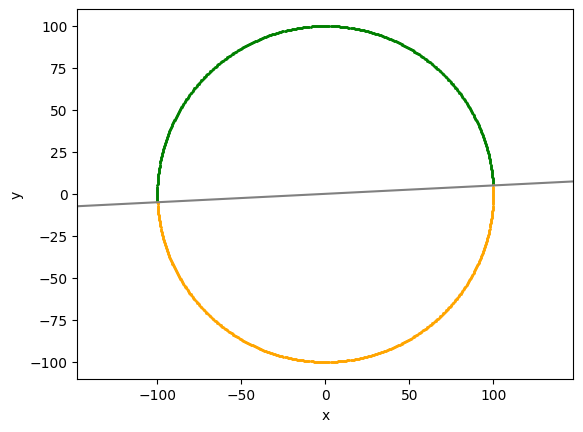

In [417]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3, 10 ** -12)
draw_line_equal(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(len(points_c),len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

1000 499 0 501


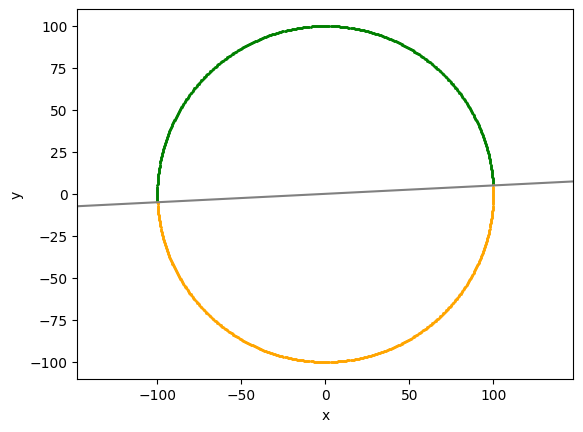

In [418]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3_lib, 10 ** -12)
draw_line_equal(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(len(points_c),len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

1000 499 0 501


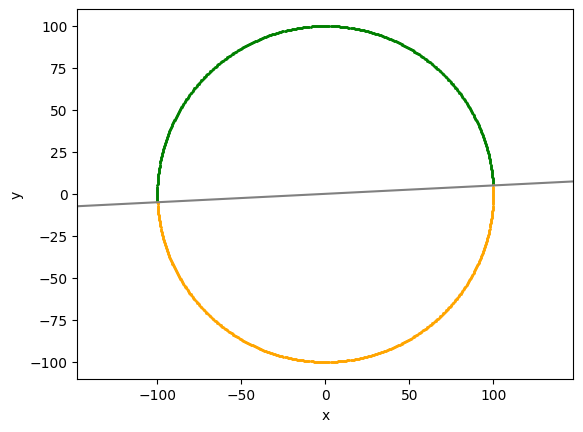

In [419]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -12)
draw_line_equal(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(len(points_c),len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

1000 499 0 501


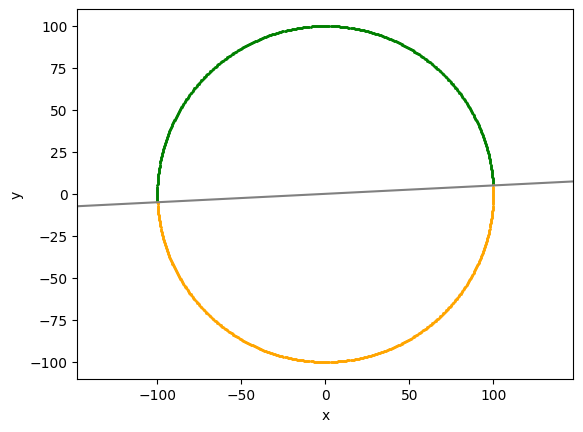

In [420]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2_lib, 10 ** -12)
draw_line_equal(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(len(points_c),len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

$$\epsilon = 10^{-10}$$


1000 499 0 501


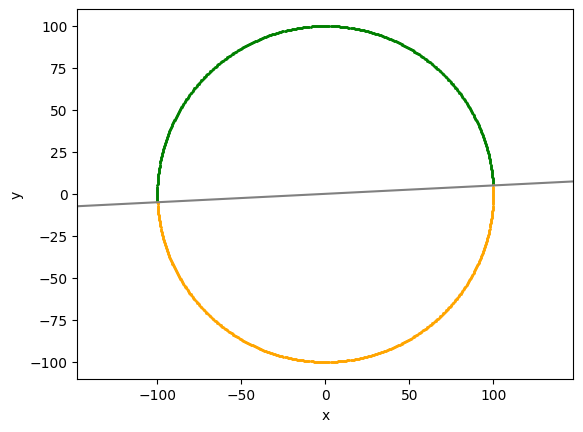

In [421]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3, 10 ** -10)
draw_line_equal(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(len(points_c),len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

1000 499 0 501


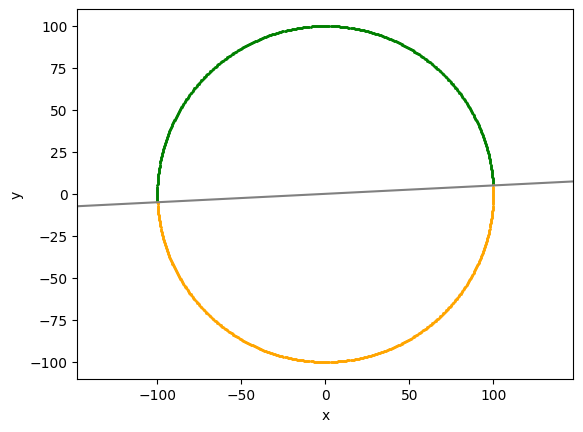

In [422]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3_lib, 10 ** -10)
draw_line_equal(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(len(points_c),len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

1000 499 0 501


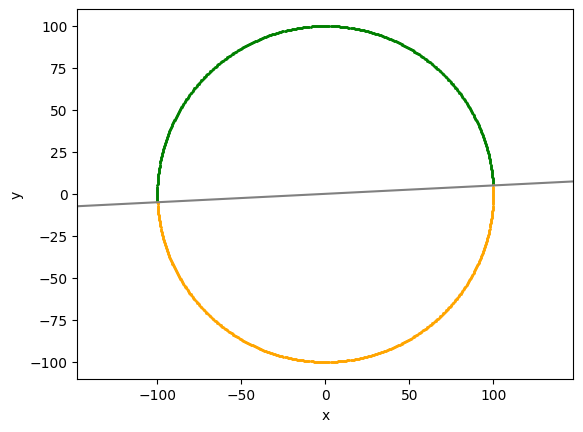

In [423]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -10)
draw_line_equal(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(len(points_c),len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

1000 499 0 501


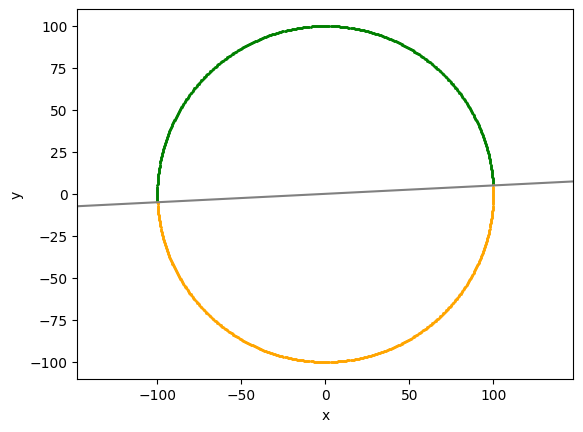

In [424]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2_lib, 10 ** -10)
draw_line_equal(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(len(points_c),len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

$$\epsilon = 10^{-8}$$


1000 499 0 501


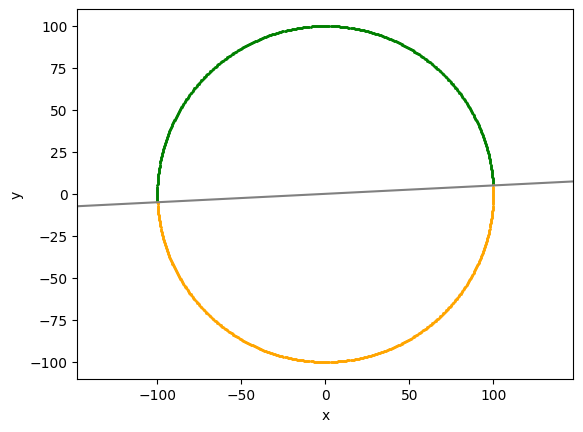

In [425]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3, 10 ** -8)
draw_line_equal(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(len(points_c),len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

1000 499 0 501


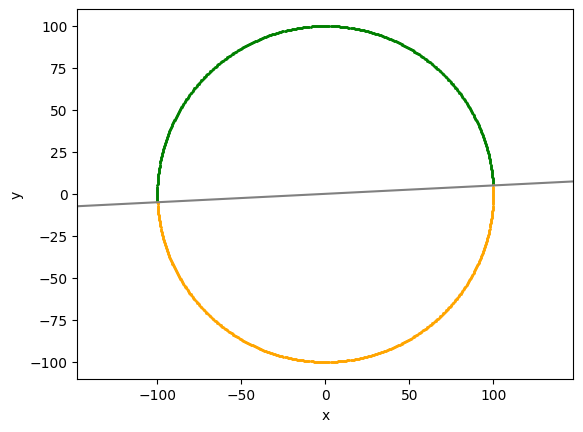

In [426]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3_lib, 10 ** -8)
draw_line_equal(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(len(points_c),len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

1000 499 0 501


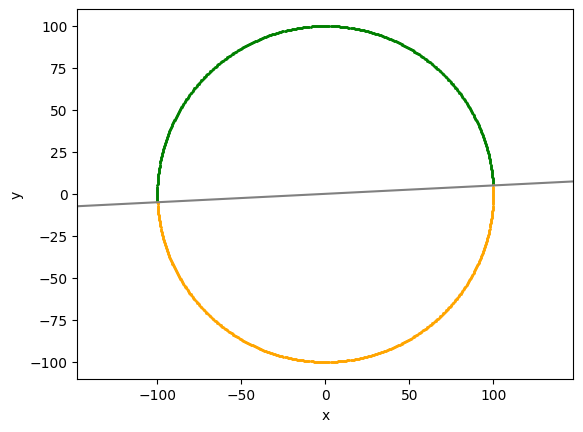

In [427]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -8)
draw_line_equal(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(len(points_c),len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

1000 499 0 501


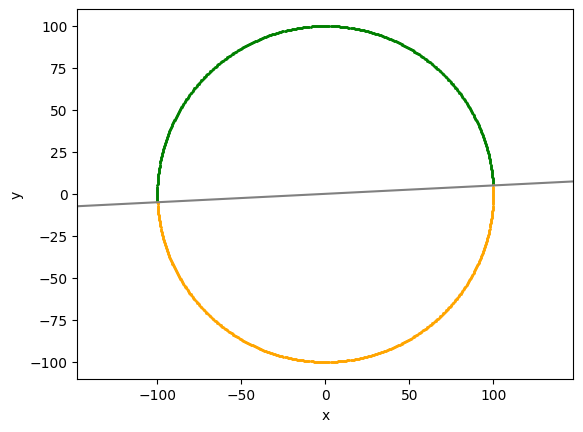

In [428]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2_lib, 10 ** -8)
draw_line_equal(classified_points_c_left, classified_points_c_mid, classified_points_c_right)
print(len(points_c),len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right))

ZBIÓR D

$$\epsilon = 0$$


1000 287 331 382


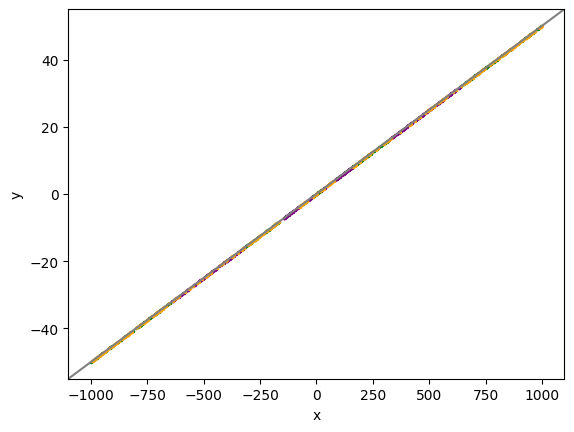

In [429]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3, 0)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(len(points_d),len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

1000 371 340 289


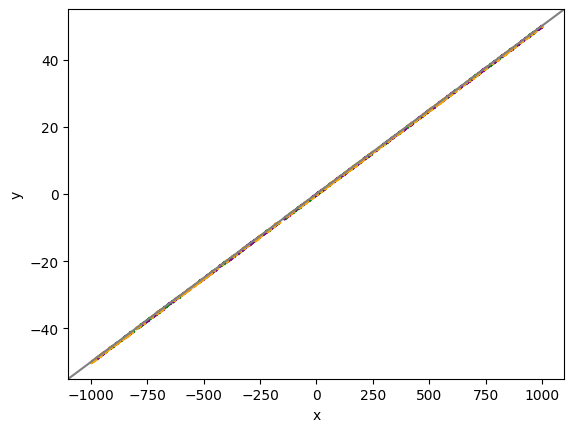

In [430]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3_lib, 0)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(len(points_d),len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

1000 161 690 149


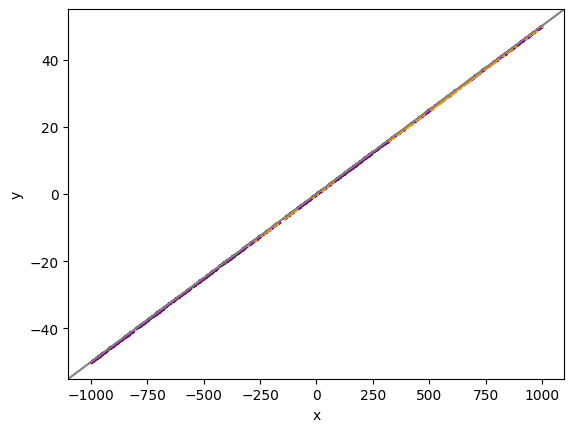

In [431]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2, 0)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(len(points_d),len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

1000 155 710 135


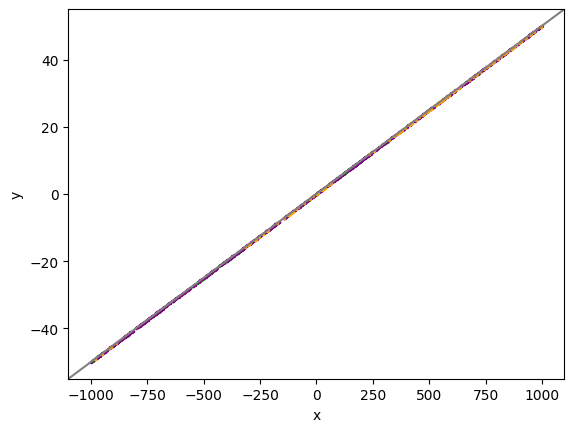

In [432]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 0)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(len(points_d),len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

$$\epsilon = 10^{-14}$$


1000 0 1000 0


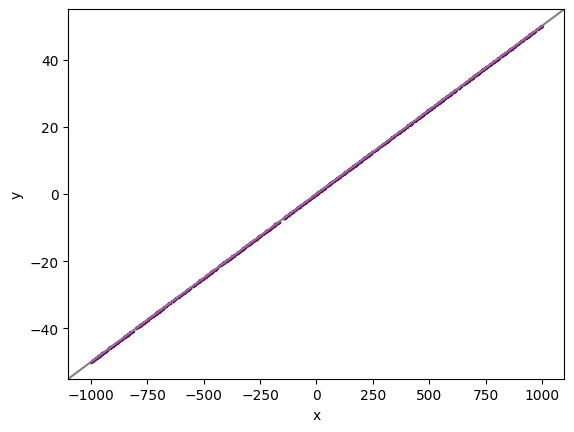

In [433]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3, 10**-14)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(len(points_d),len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

1000 37 913 50


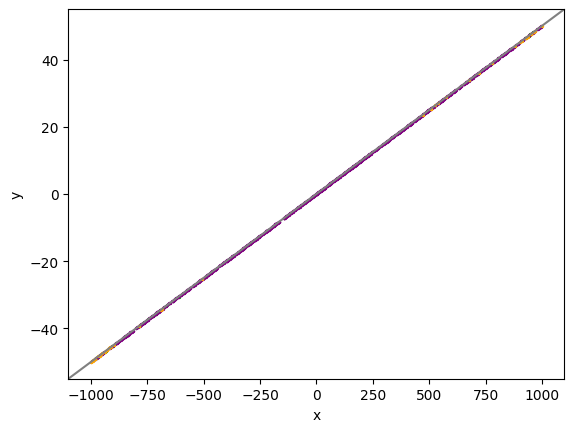

In [434]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3_lib, 10**-14)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(len(points_d),len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

1000 149 709 142


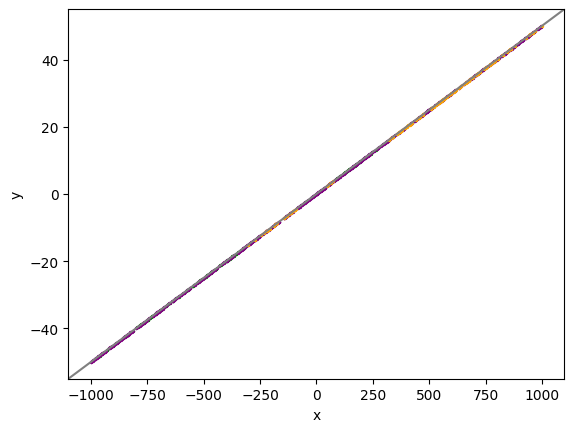

In [435]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2, 10**-14)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(len(points_d),len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

1000 145 729 126


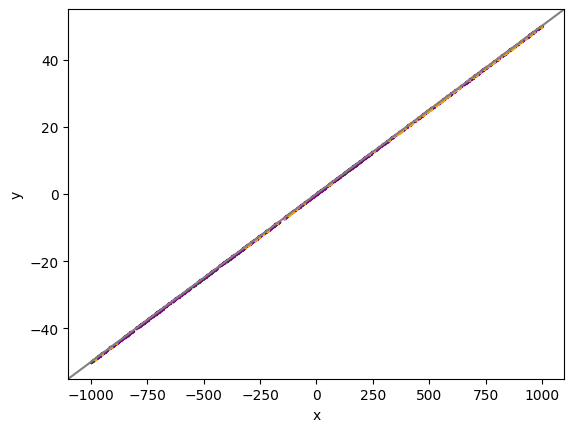

In [436]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10**-14)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(len(points_d),len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

$$\epsilon = 10^{-12}$$


1000 0 1000 0


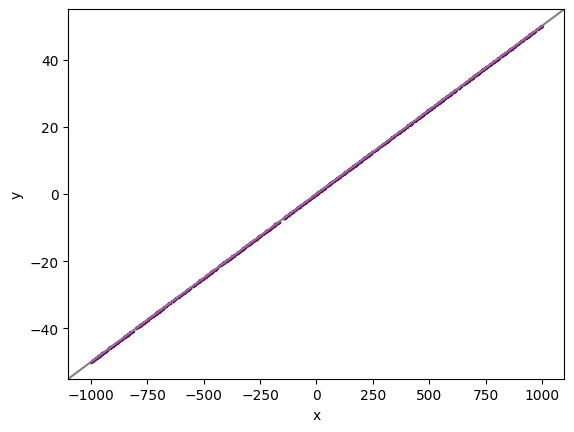

In [437]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3, 10**-12)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(len(points_d),len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

1000 0 1000 0


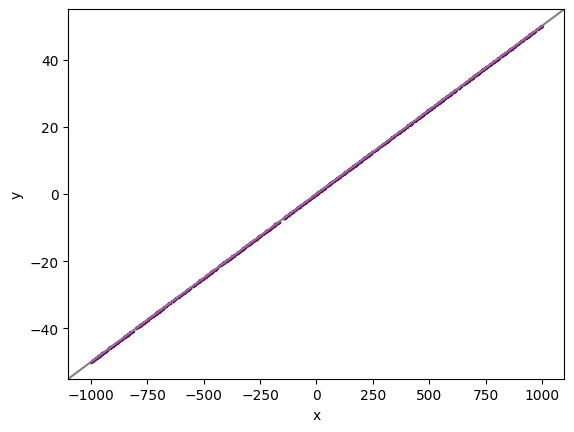

In [438]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3_lib, 10**-12)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(len(points_d),len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

1000 79 829 92


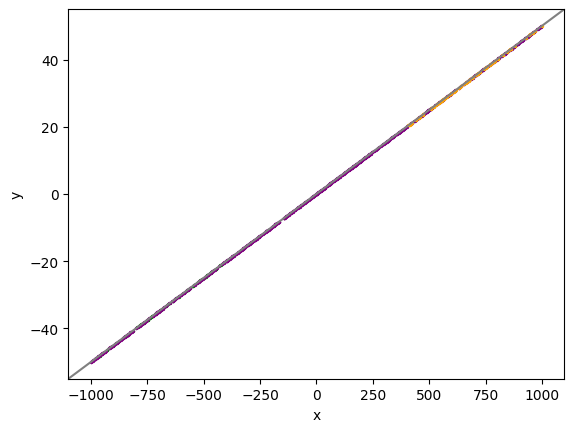

In [439]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2, 10**-12)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(len(points_d),len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

1000 98 804 98


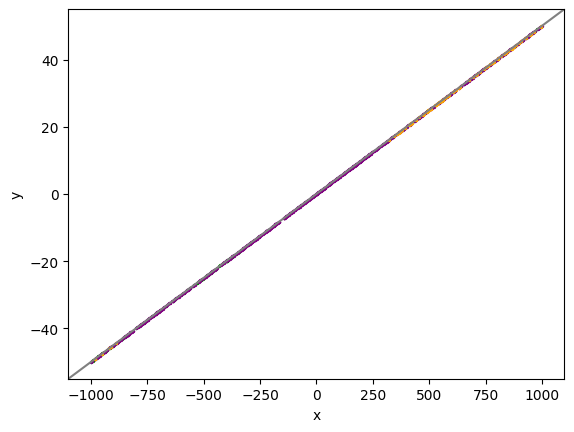

In [440]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10**-12)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(len(points_d),len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

$$\epsilon = 10^{-10}$$


1000 0 1000 0


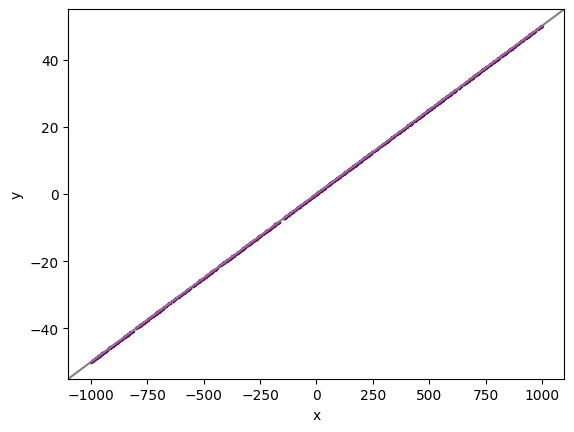

In [441]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3, 10**-10)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(len(points_d),len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

1000 0 1000 0


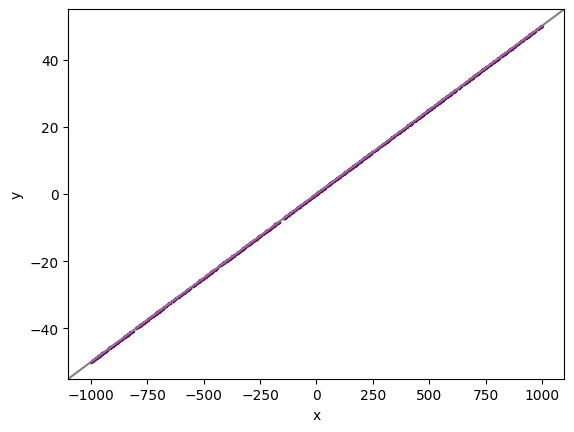

In [442]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3_lib, 10**-10)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(len(points_d),len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

1000 0 1000 0


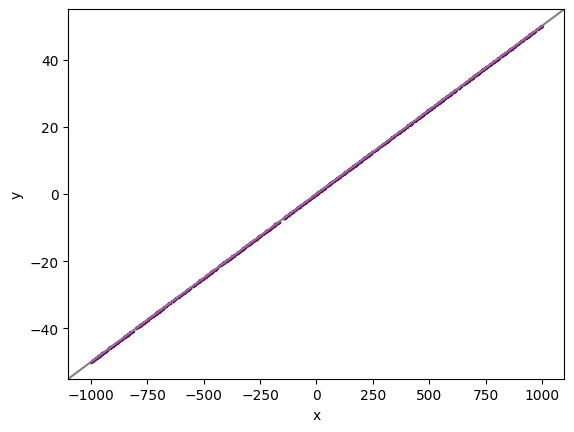

In [443]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2, 10**-10)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(len(points_d),len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

1000 0 1000 0


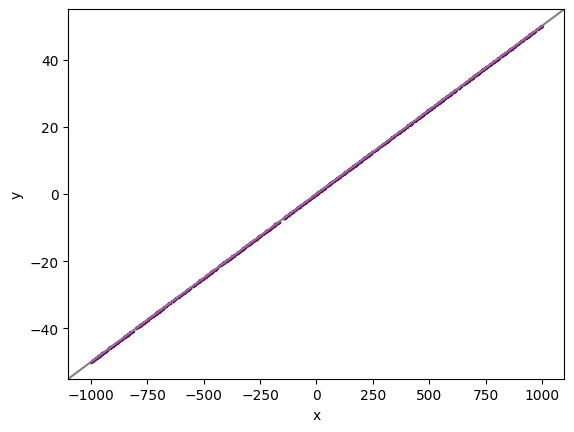

In [444]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10**-10)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(len(points_d),len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

$$\epsilon = 10^{-8}$$


1000 0 1000 0


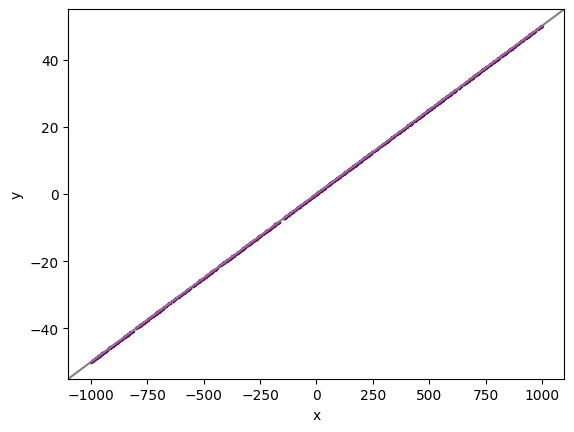

In [445]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3, 10**-8)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(len(points_d),len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

1000 0 1000 0


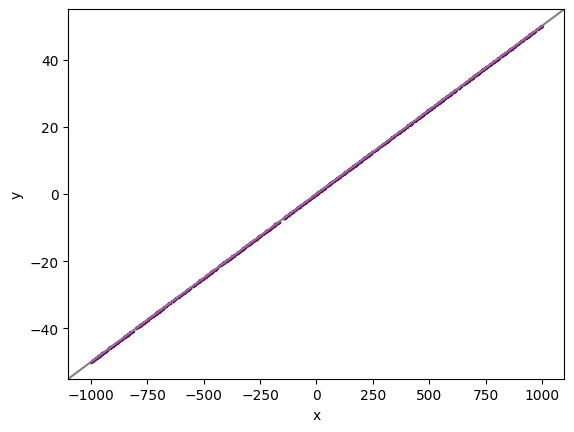

In [446]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3_lib, 10**-8)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(len(points_d),len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

1000 0 1000 0


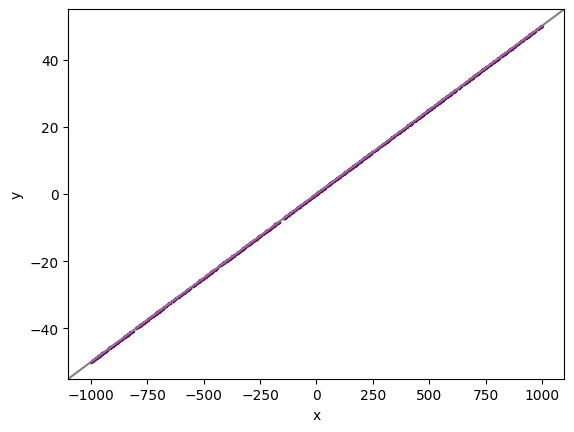

In [447]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2, 10**-8)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(len(points_d),len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

1000 0 1000 0


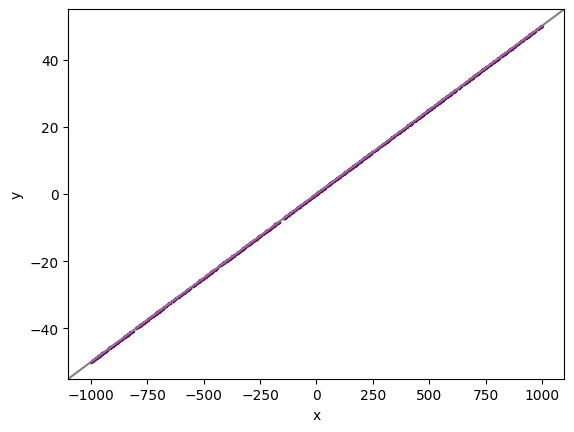

In [448]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10**-8)
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)
print(len(points_d),len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right))

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

In [449]:
points_a_float32 = np.float32(points_a)
points_b_float32 = np.float32(points_b)
points_c_float32 = np.float32(points_c)
points_d_float32 = np.float32(points_d)


Porównaj wyniki klasyfikacji dla współrzędnych punktów o zmiejszonej precyzji floata

ZBIÓR A

$$\epsilon = 0$$

100000 49802 0 50198


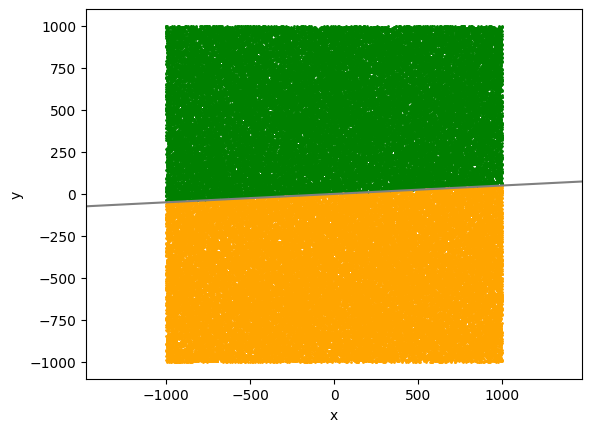

In [450]:
classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right = categorize_points(points_a_float32, a, b, mat_det_3x3, 0)
draw_line_equal(classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right)
print(len(points_a_float32),len(classified_points_a_float32_left),len(classified_points_a_float32_mid),len(classified_points_a_float32_right))

100000 49802 0 50198


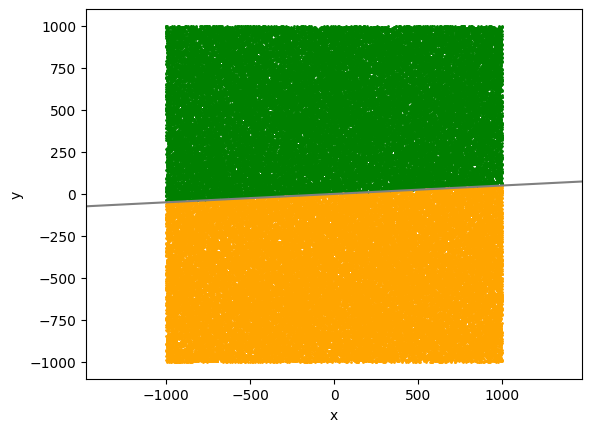

In [451]:
classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right = categorize_points(points_a_float32, a, b, mat_det_3x3_lib, 0)
draw_line_equal(classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right)
print(len(points_a_float32),len(classified_points_a_float32_left),len(classified_points_a_float32_mid),len(classified_points_a_float32_right))

100000 49802 0 50198


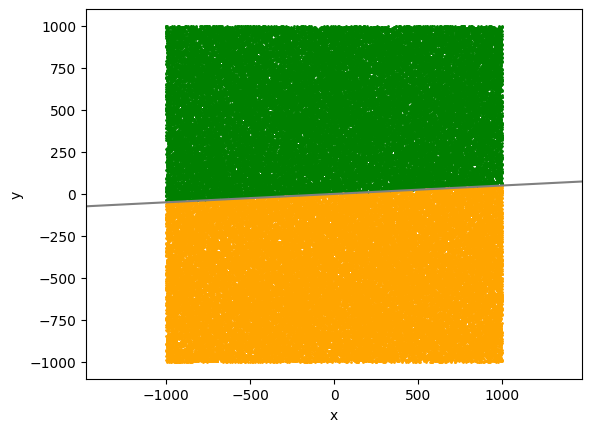

In [452]:
classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right = categorize_points(points_a_float32, a, b, mat_det_2x2, 0)
draw_line_equal(classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right)
print(len(points_a_float32),len(classified_points_a_float32_left),len(classified_points_a_float32_mid),len(classified_points_a_float32_right))

100000 49802 0 50198


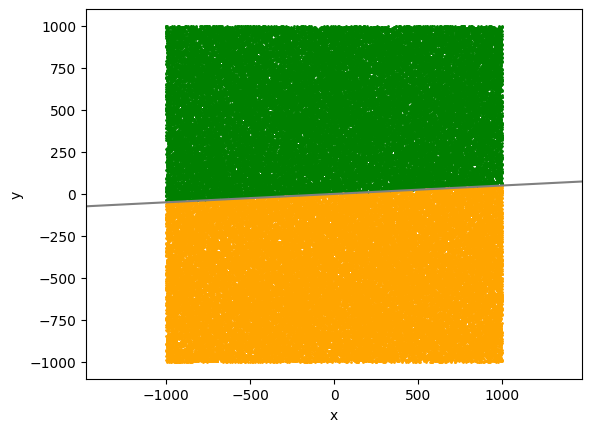

In [453]:
classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right = categorize_points(points_a_float32, a, b, mat_det_2x2_lib, 0)
draw_line_equal(classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right)
print(len(points_a_float32),len(classified_points_a_float32_left),len(classified_points_a_float32_mid),len(classified_points_a_float32_right))

$$\epsilon = 10^{-14}$$

100000 49802 0 50198


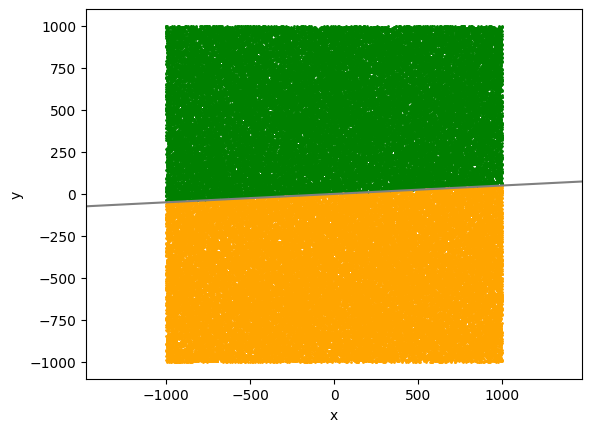

In [454]:
classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right = categorize_points(points_a_float32, a, b, mat_det_3x3, 10 ** -14)
draw_line_equal(classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right)
print(len(points_a_float32),len(classified_points_a_float32_left),len(classified_points_a_float32_mid),len(classified_points_a_float32_right))

100000 49802 0 50198


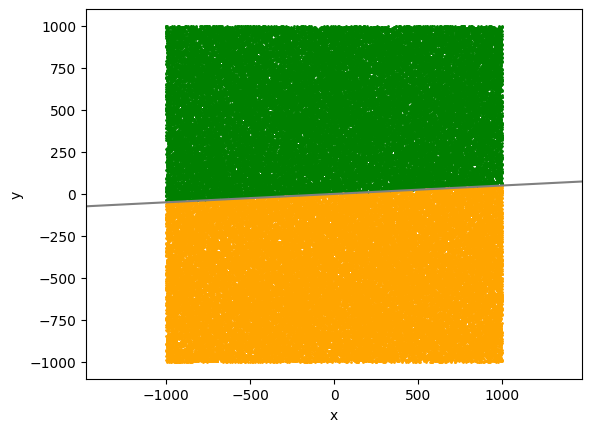

In [455]:
classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right = categorize_points(points_a_float32, a, b, mat_det_3x3_lib, 10 ** -14)
draw_line_equal(classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right)
print(len(points_a_float32),len(classified_points_a_float32_left),len(classified_points_a_float32_mid),len(classified_points_a_float32_right))

100000 49802 0 50198


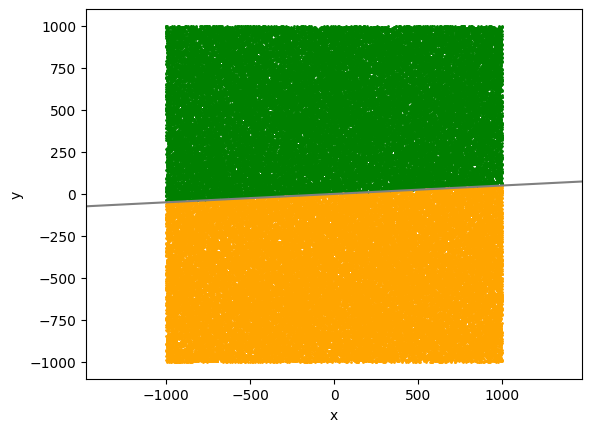

In [456]:
classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right = categorize_points(points_a_float32, a, b, mat_det_2x2, 10 ** -14)
draw_line_equal(classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right)
print(len(points_a_float32),len(classified_points_a_float32_left),len(classified_points_a_float32_mid),len(classified_points_a_float32_right))

100000 49802 0 50198


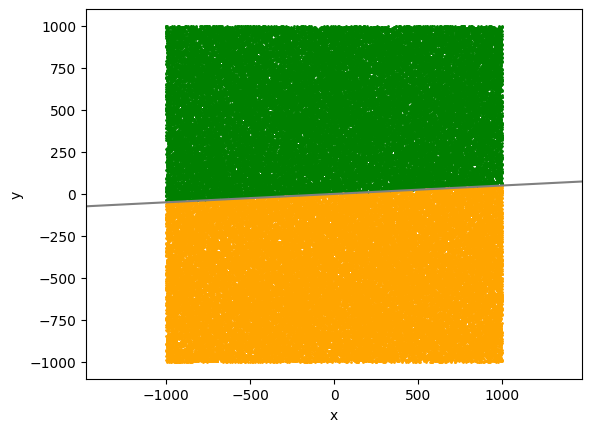

In [457]:
classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right = categorize_points(points_a_float32, a, b, mat_det_2x2_lib, 10 ** -14)
draw_line_equal(classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right)
print(len(points_a_float32),len(classified_points_a_float32_left),len(classified_points_a_float32_mid),len(classified_points_a_float32_right))

$$\epsilon = 10^{-12}$$

100000 49802 0 50198


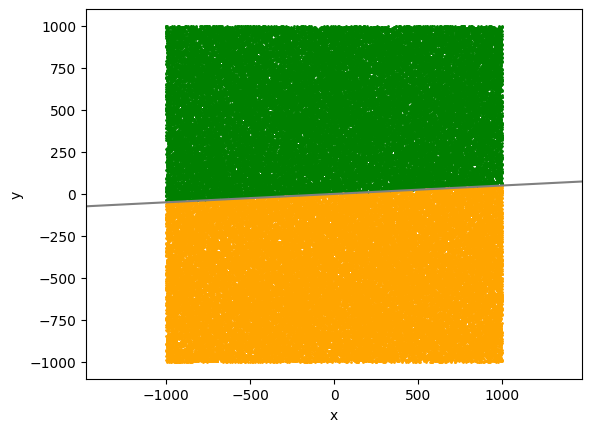

In [458]:
classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right = categorize_points(points_a_float32, a, b, mat_det_3x3, 10 ** -12)
draw_line_equal(classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right)
print(len(points_a_float32),len(classified_points_a_float32_left),len(classified_points_a_float32_mid),len(classified_points_a_float32_right))

100000 49802 0 50198


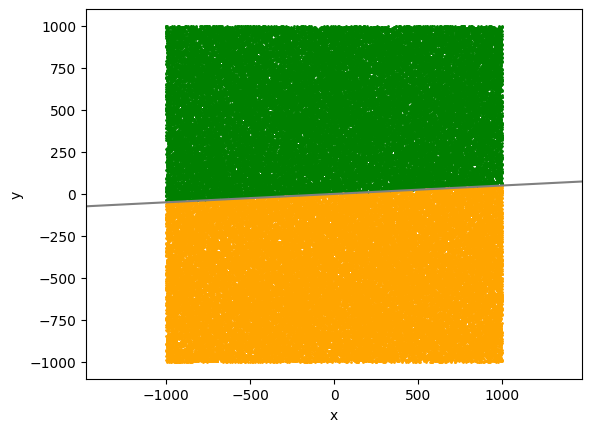

In [459]:
classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right = categorize_points(points_a_float32, a, b, mat_det_3x3_lib, 10 ** -12)
draw_line_equal(classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right)
print(len(points_a_float32),len(classified_points_a_float32_left),len(classified_points_a_float32_mid),len(classified_points_a_float32_right))

100000 49802 0 50198


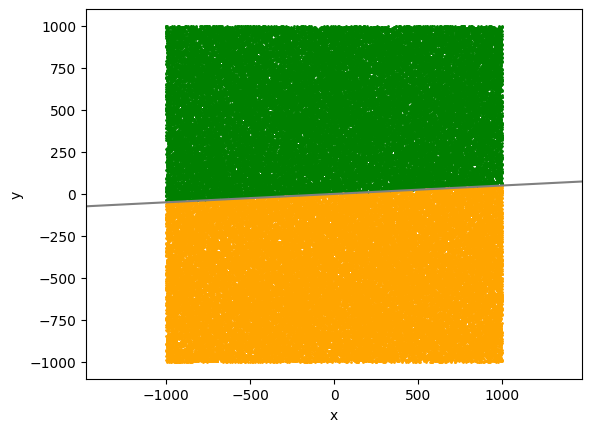

In [460]:
classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right = categorize_points(points_a_float32, a, b, mat_det_2x2, 10 ** -12)
draw_line_equal(classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right)
print(len(points_a_float32),len(classified_points_a_float32_left),len(classified_points_a_float32_mid),len(classified_points_a_float32_right))

100000 49802 0 50198


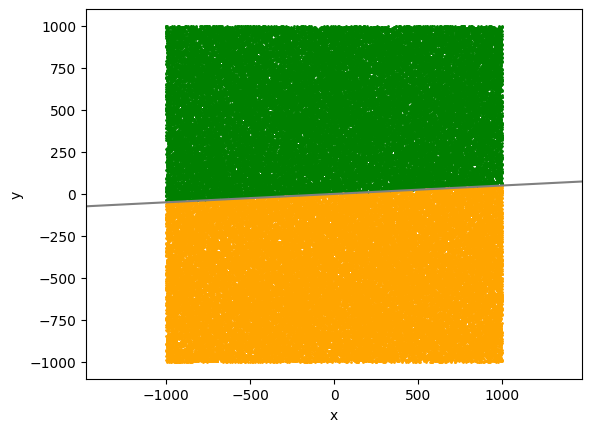

In [461]:
classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right = categorize_points(points_a_float32, a, b, mat_det_2x2_lib, 10 ** -12)
draw_line_equal(classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right)
print(len(points_a_float32),len(classified_points_a_float32_left),len(classified_points_a_float32_mid),len(classified_points_a_float32_right))

$$\epsilon = 10^{-10}$$

100000 49802 0 50198


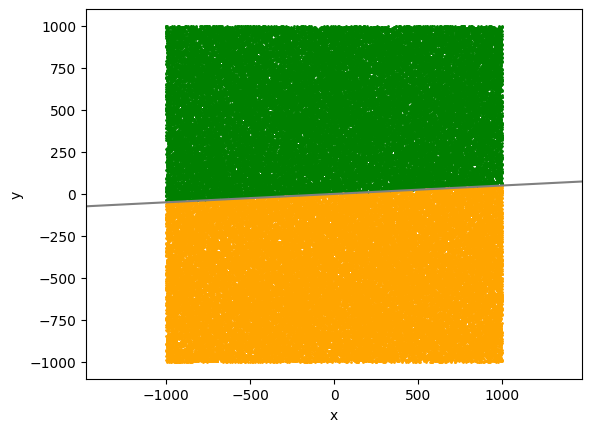

In [462]:
classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right = categorize_points(points_a_float32, a, b, mat_det_3x3, 10 ** -10)
draw_line_equal(classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right)
print(len(points_a_float32),len(classified_points_a_float32_left),len(classified_points_a_float32_mid),len(classified_points_a_float32_right))

100000 49802 0 50198


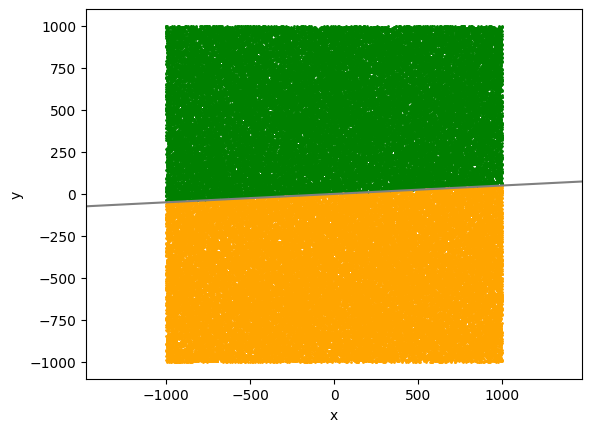

In [463]:
classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right = categorize_points(points_a_float32, a, b, mat_det_3x3_lib, 10 ** -10)
draw_line_equal(classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right)
print(len(points_a_float32),len(classified_points_a_float32_left),len(classified_points_a_float32_mid),len(classified_points_a_float32_right))

100000 49802 0 50198


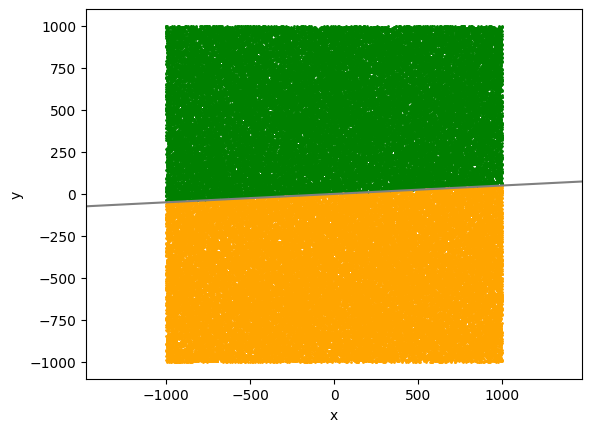

In [464]:
classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right = categorize_points(points_a_float32, a, b, mat_det_2x2, 10 ** -10)
draw_line_equal(classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right)
print(len(points_a_float32),len(classified_points_a_float32_left),len(classified_points_a_float32_mid),len(classified_points_a_float32_right))

100000 49802 0 50198


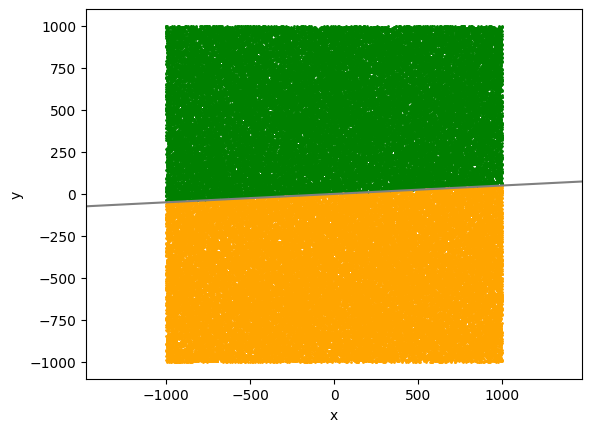

In [465]:
classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right = categorize_points(points_a_float32, a, b, mat_det_2x2_lib, 10 ** -10)
draw_line_equal(classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right)
print(len(points_a_float32),len(classified_points_a_float32_left),len(classified_points_a_float32_mid),len(classified_points_a_float32_right))

$$\epsilon = 10^{-8}$$

100000 49802 0 50198


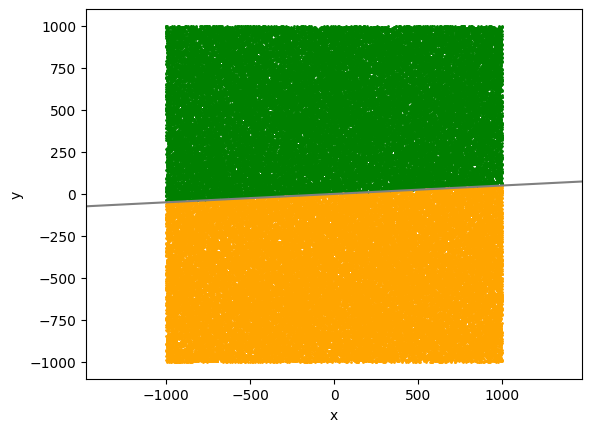

In [466]:
classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right = categorize_points(points_a_float32, a, b, mat_det_3x3, 10 ** -8)
draw_line_equal(classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right)
print(len(points_a_float32),len(classified_points_a_float32_left),len(classified_points_a_float32_mid),len(classified_points_a_float32_right))

100000 49802 0 50198


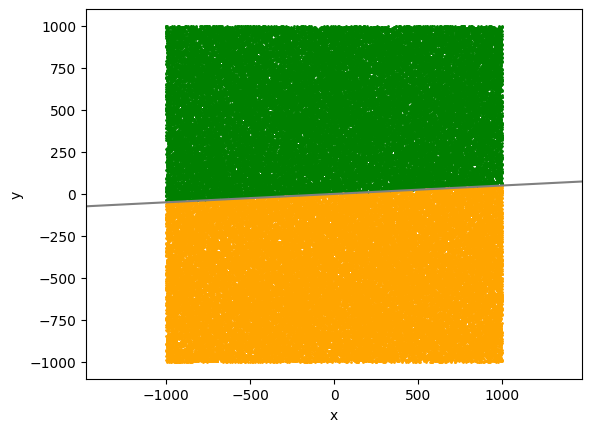

In [467]:
classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right = categorize_points(points_a_float32, a, b, mat_det_3x3_lib, 10 ** -8)
draw_line_equal(classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right)
print(len(points_a_float32),len(classified_points_a_float32_left),len(classified_points_a_float32_mid),len(classified_points_a_float32_right))

100000 49802 0 50198


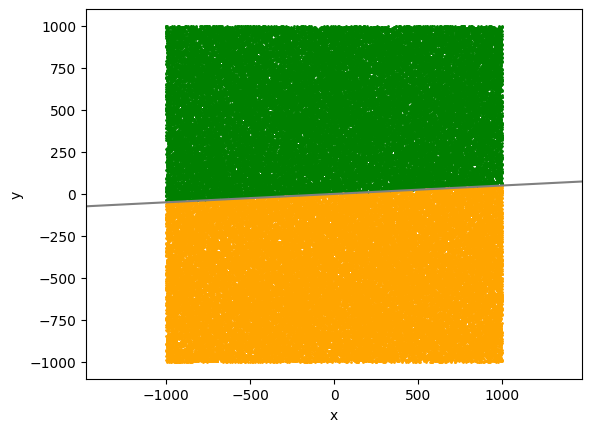

In [468]:
classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right = categorize_points(points_a_float32, a, b, mat_det_2x2, 10 ** -8)
draw_line_equal(classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right)
print(len(points_a_float32),len(classified_points_a_float32_left),len(classified_points_a_float32_mid),len(classified_points_a_float32_right))

100000 49802 0 50198


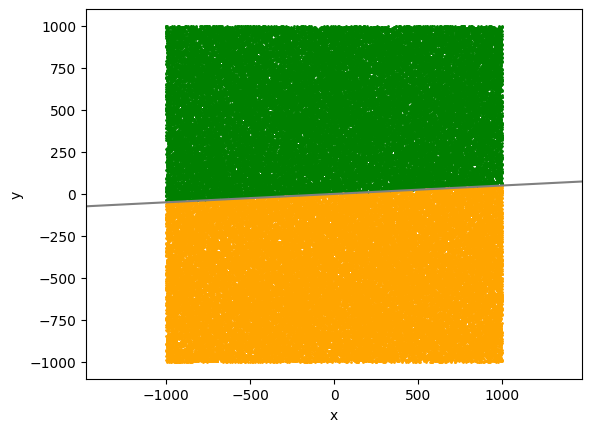

In [469]:
classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right = categorize_points(points_a_float32, a, b, mat_det_2x2_lib, 10 ** -8)
draw_line_equal(classified_points_a_float32_left, classified_points_a_float32_mid, classified_points_a_float32_right)
print(len(points_a_float32),len(classified_points_a_float32_left),len(classified_points_a_float32_mid),len(classified_points_a_float32_right))

ZBIÓR B

$$\epsilon = 0$$

100000 49836 0 50164


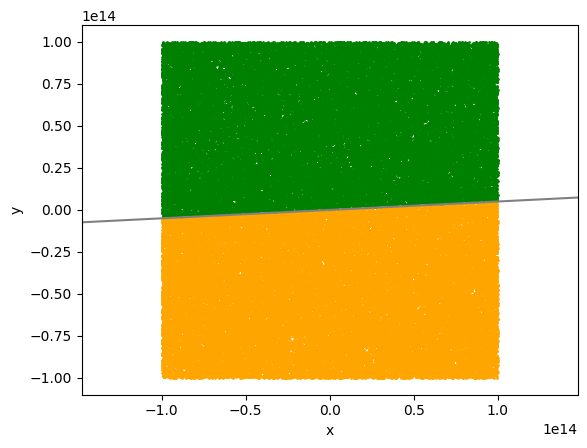

In [470]:
classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right = categorize_points(points_b_float32, a, b, mat_det_3x3, 0)
draw_line_equal(classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right)
print(len(points_b_float32),len(classified_points_b_float32_left),len(classified_points_b_float32_mid),len(classified_points_b_float32_right))

100000 49836 0 50164


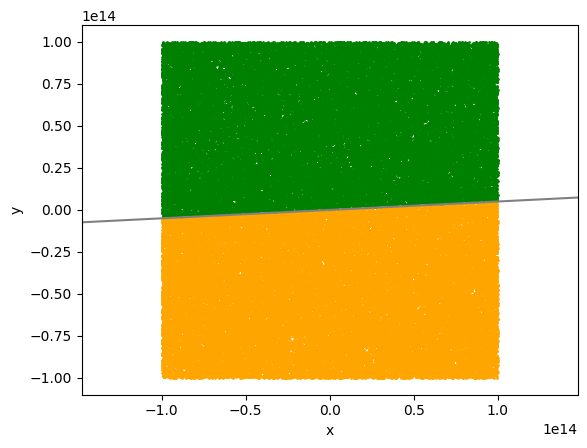

In [471]:
classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right = categorize_points(points_b_float32, a, b, mat_det_3x3_lib, 0)
draw_line_equal(classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right)
print(len(points_b_float32),len(classified_points_b_float32_left),len(classified_points_b_float32_mid),len(classified_points_b_float32_right))

100000 0 100000 0


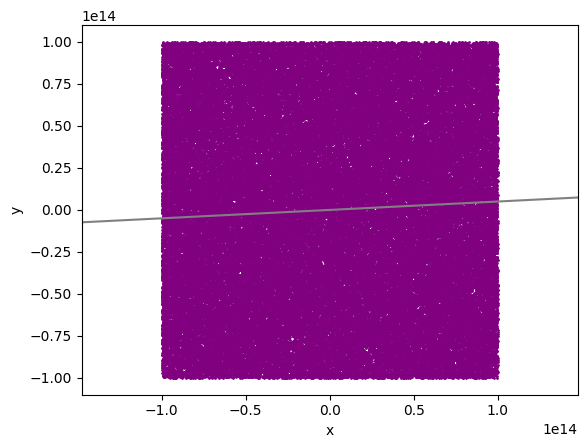

In [472]:
classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right = categorize_points(points_b_float32, a, b, mat_det_2x2, 0)
draw_line_equal(classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right)
print(len(points_b_float32),len(classified_points_b_float32_left),len(classified_points_b_float32_mid),len(classified_points_b_float32_right))

100000 6652 86628 6720


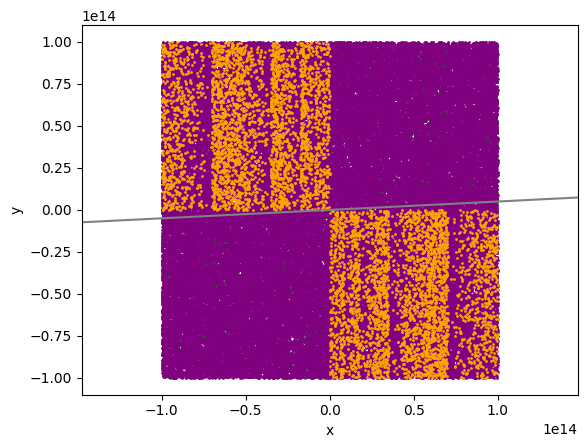

In [473]:
classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right = categorize_points(points_b_float32, a, b, mat_det_2x2_lib, 0)
draw_line_equal(classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right)
print(len(points_b_float32),len(classified_points_b_float32_left),len(classified_points_b_float32_mid),len(classified_points_b_float32_right))

$$\epsilon = 10^{-14}$$

100000 49836 0 50164


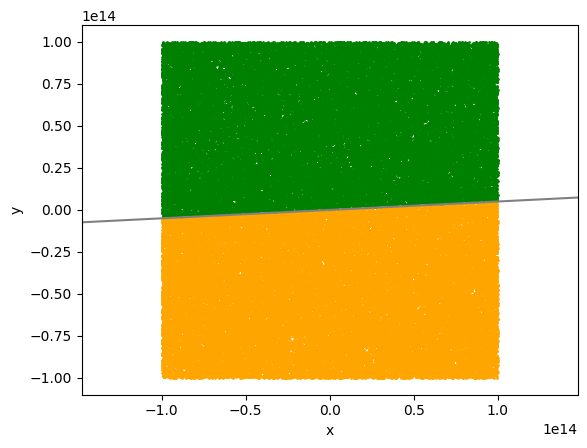

In [474]:
classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right = categorize_points(points_b_float32, a, b, mat_det_3x3, 10 ** -14)
draw_line_equal(classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right)
print(len(points_b_float32),len(classified_points_b_float32_left),len(classified_points_b_float32_mid),len(classified_points_b_float32_right))

100000 49836 0 50164


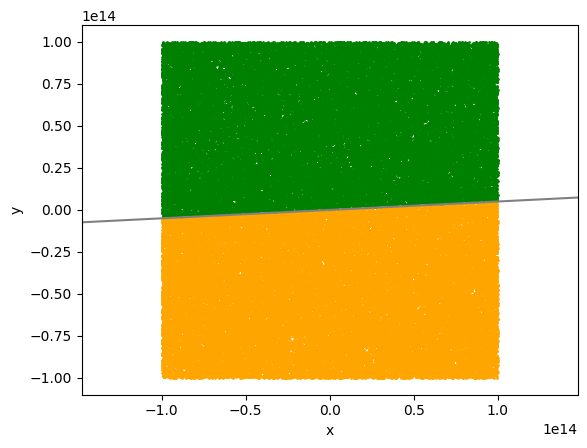

In [475]:
classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right = categorize_points(points_b_float32, a, b, mat_det_3x3_lib, 10 ** -14)
draw_line_equal(classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right)
print(len(points_b_float32),len(classified_points_b_float32_left),len(classified_points_b_float32_mid),len(classified_points_b_float32_right))

100000 0 100000 0


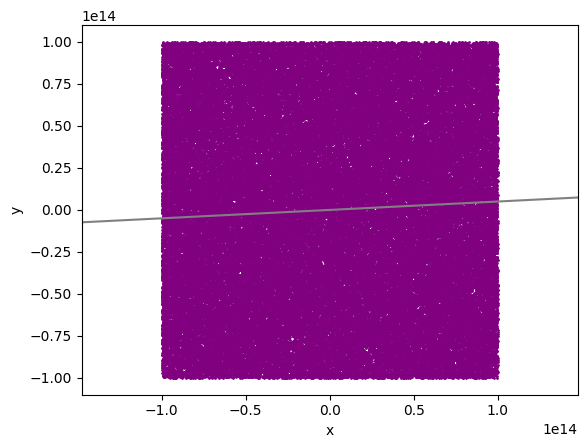

In [476]:
classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right = categorize_points(points_b_float32, a, b, mat_det_2x2, 10 ** -14)
draw_line_equal(classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right)
print(len(points_b_float32),len(classified_points_b_float32_left),len(classified_points_b_float32_mid),len(classified_points_b_float32_right))

100000 6652 86628 6720


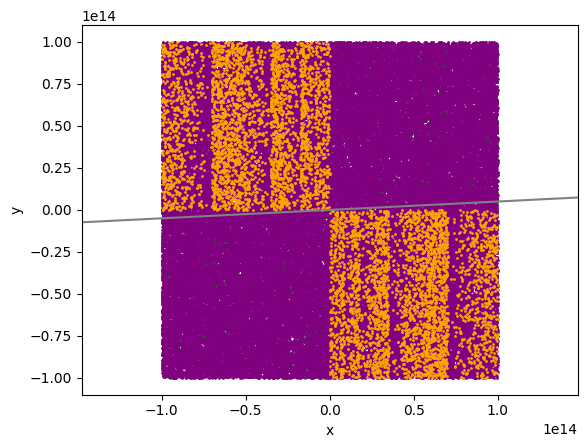

In [477]:
classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right = categorize_points(points_b_float32, a, b, mat_det_2x2_lib, 10 ** -14)
draw_line_equal(classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right)
print(len(points_b_float32),len(classified_points_b_float32_left),len(classified_points_b_float32_mid),len(classified_points_b_float32_right))

$$\epsilon = 10^{-12}$$

100000 49836 0 50164


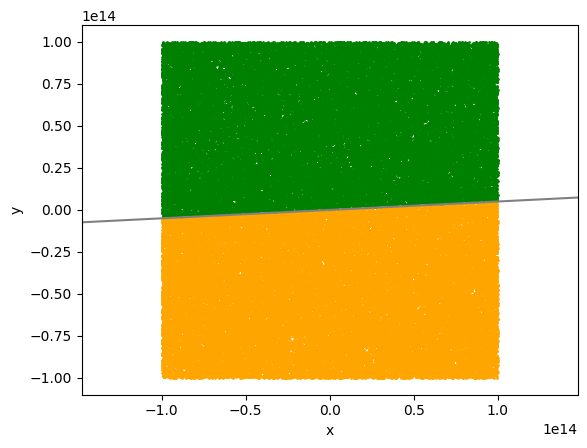

In [478]:
classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right = categorize_points(points_b_float32, a, b, mat_det_3x3, 10 ** -12)
draw_line_equal(classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right)
print(len(points_b_float32),len(classified_points_b_float32_left),len(classified_points_b_float32_mid),len(classified_points_b_float32_right))

100000 49836 0 50164


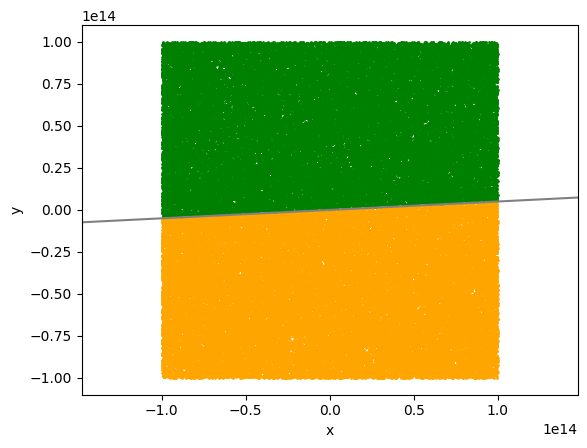

In [479]:
classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right = categorize_points(points_b_float32, a, b, mat_det_3x3_lib, 10 ** -12)
draw_line_equal(classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right)
print(len(points_b_float32),len(classified_points_b_float32_left),len(classified_points_b_float32_mid),len(classified_points_b_float32_right))

100000 0 100000 0


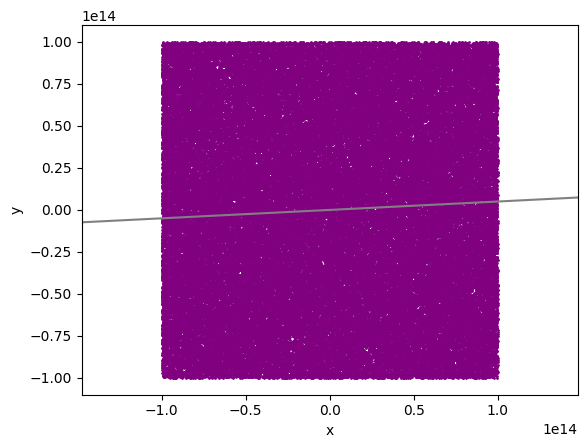

In [480]:
classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right = categorize_points(points_b_float32, a, b, mat_det_2x2, 10 ** -12)
draw_line_equal(classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right)
print(len(points_b_float32),len(classified_points_b_float32_left),len(classified_points_b_float32_mid),len(classified_points_b_float32_right))

100000 6652 86628 6720


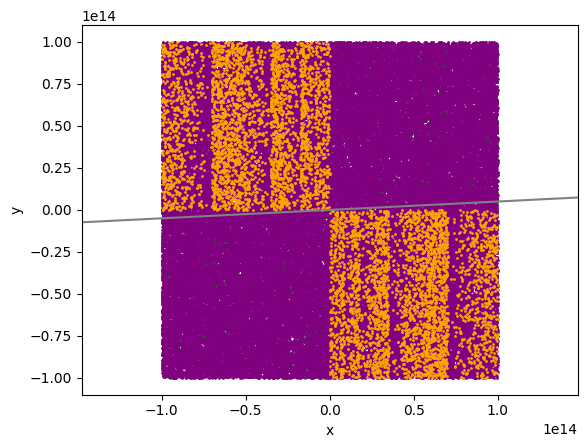

In [481]:
classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right = categorize_points(points_b_float32, a, b, mat_det_2x2_lib, 10 ** -12)
draw_line_equal(classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right)
print(len(points_b_float32),len(classified_points_b_float32_left),len(classified_points_b_float32_mid),len(classified_points_b_float32_right))

$$\epsilon = 10^{-10}$$

100000 49836 0 50164


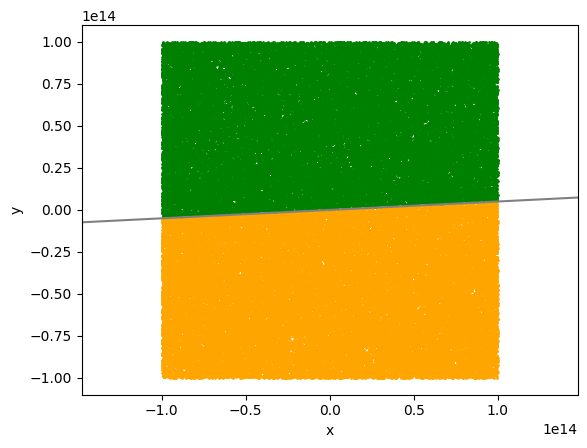

In [482]:
classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right = categorize_points(points_b_float32, a, b, mat_det_3x3, 10 ** -10)
draw_line_equal(classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right)
print(len(points_b_float32),len(classified_points_b_float32_left),len(classified_points_b_float32_mid),len(classified_points_b_float32_right))

100000 49836 0 50164


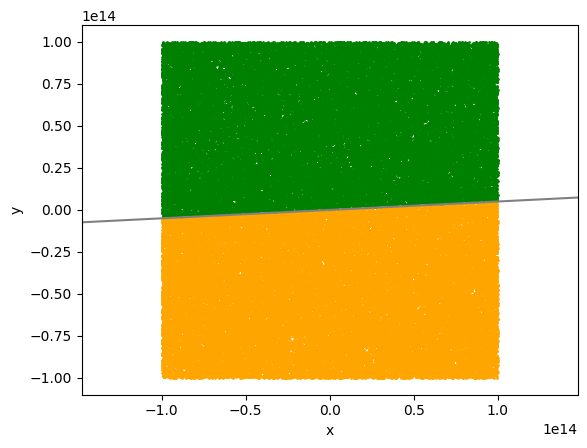

In [483]:
classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right = categorize_points(points_b_float32, a, b, mat_det_3x3_lib, 10 ** -10)
draw_line_equal(classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right)
print(len(points_b_float32),len(classified_points_b_float32_left),len(classified_points_b_float32_mid),len(classified_points_b_float32_right))

100000 0 100000 0


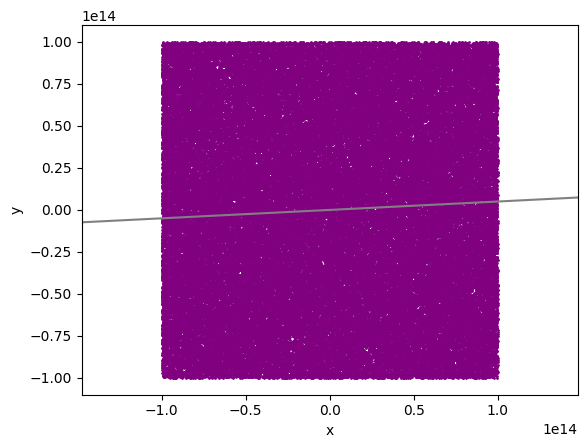

In [484]:
classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right = categorize_points(points_b_float32, a, b, mat_det_2x2, 10 ** -10)
draw_line_equal(classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right)
print(len(points_b_float32),len(classified_points_b_float32_left),len(classified_points_b_float32_mid),len(classified_points_b_float32_right))

100000 6652 86628 6720


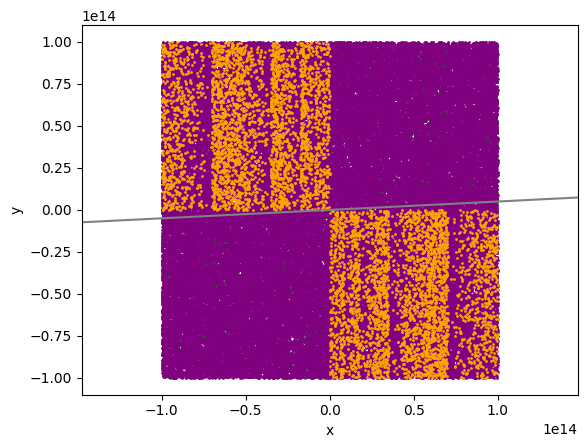

In [485]:
classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right = categorize_points(points_b_float32, a, b, mat_det_2x2_lib, 10 ** -10)
draw_line_equal(classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right)
print(len(points_b_float32),len(classified_points_b_float32_left),len(classified_points_b_float32_mid),len(classified_points_b_float32_right))

$$\epsilon = 10^{-8}$$

100000 49836 0 50164


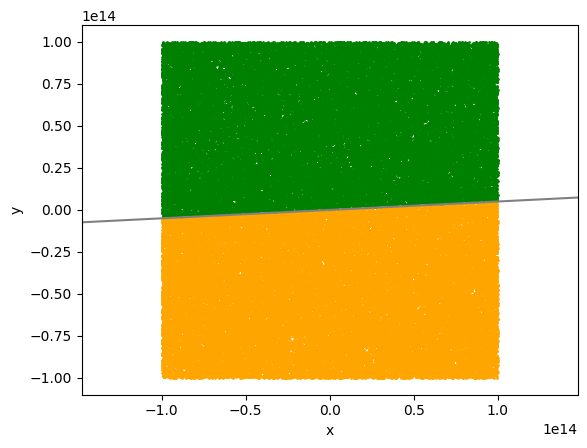

In [486]:
classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right = categorize_points(points_b_float32, a, b, mat_det_3x3, 10 ** -8)
draw_line_equal(classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right)
print(len(points_b_float32),len(classified_points_b_float32_left),len(classified_points_b_float32_mid),len(classified_points_b_float32_right))

100000 49836 0 50164


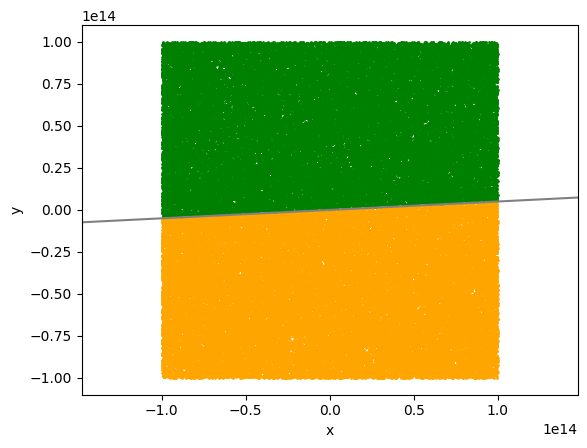

In [487]:
classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right = categorize_points(points_b_float32, a, b, mat_det_3x3_lib, 10 ** -8)
draw_line_equal(classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right)
print(len(points_b_float32),len(classified_points_b_float32_left),len(classified_points_b_float32_mid),len(classified_points_b_float32_right))

100000 0 100000 0


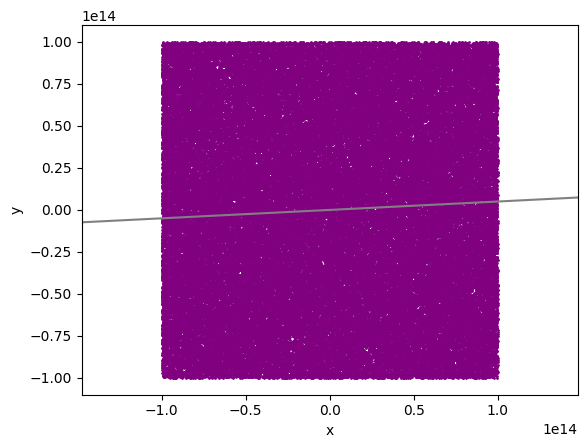

In [488]:
classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right = categorize_points(points_b_float32, a, b, mat_det_2x2, 10 ** -8)
draw_line_equal(classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right)
print(len(points_b_float32),len(classified_points_b_float32_left),len(classified_points_b_float32_mid),len(classified_points_b_float32_right))

100000 6652 86628 6720


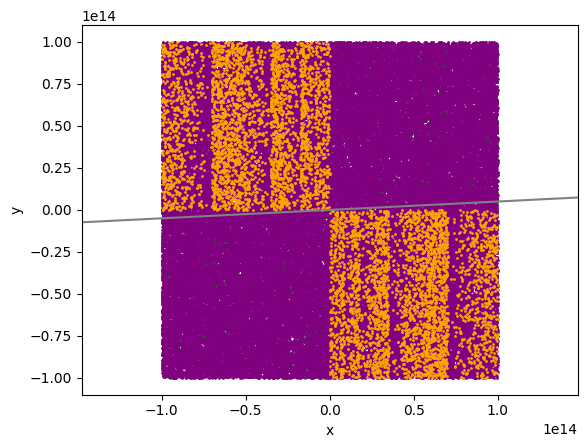

In [530]:
classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right = categorize_points(points_b_float32, a, b, mat_det_2x2_lib, 10 ** -8)
draw_line_equal(classified_points_b_float32_left, classified_points_b_float32_mid, classified_points_b_float32_right)
print(len(points_b_float32),len(classified_points_b_float32_left),len(classified_points_b_float32_mid),len(classified_points_b_float32_right))

ZBIÓR C

$$\epsilon = 0$$

1000 499 0 501


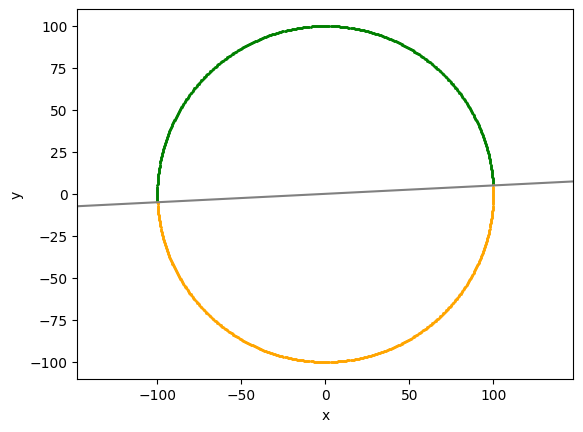

In [490]:
classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right = categorize_points(points_c_float32, a, b, mat_det_3x3, 0)
draw_line_equal(classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right)
print(len(points_c_float32),len(classified_points_c_float32_left),len(classified_points_c_float32_mid),len(classified_points_c_float32_right))

1000 499 0 501


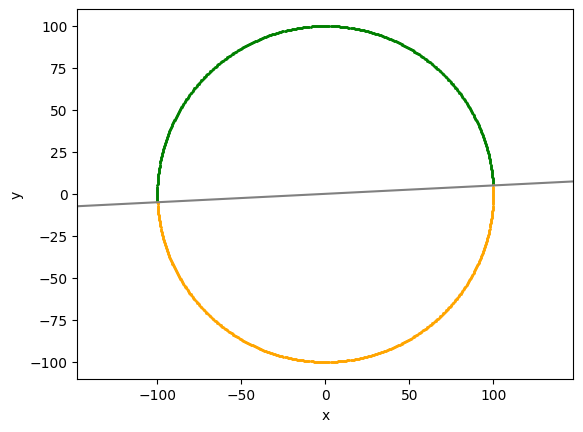

In [491]:
classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right = categorize_points(points_c_float32, a, b, mat_det_3x3_lib, 0)
draw_line_equal(classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right)
print(len(points_c_float32),len(classified_points_c_float32_left),len(classified_points_c_float32_mid),len(classified_points_c_float32_right))

1000 499 0 501


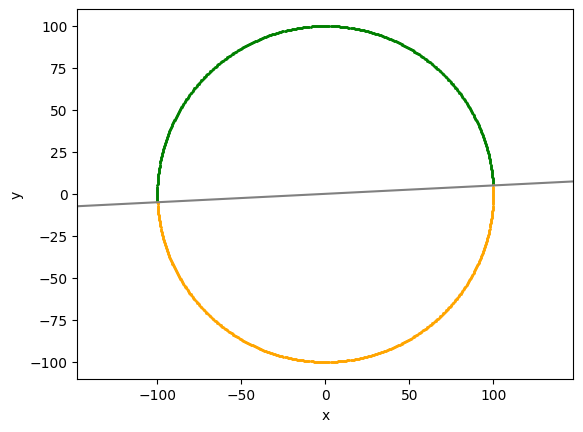

In [492]:
classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right = categorize_points(points_c_float32, a, b, mat_det_2x2, 0)
draw_line_equal(classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right)
print(len(points_c_float32),len(classified_points_c_float32_left),len(classified_points_c_float32_mid),len(classified_points_c_float32_right))

1000 499 0 501


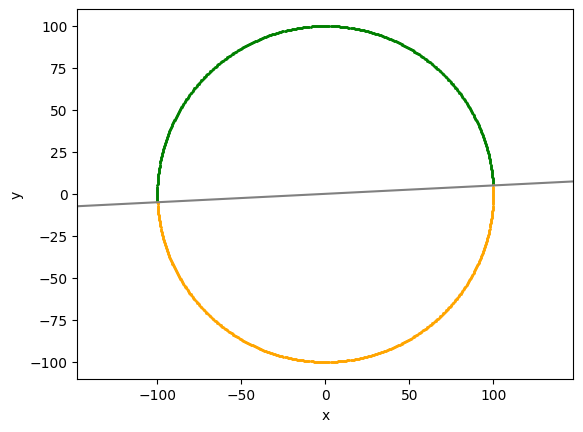

In [493]:
classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right = categorize_points(points_c_float32, a, b, mat_det_2x2_lib, 0)
draw_line_equal(classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right)
print(len(points_c_float32),len(classified_points_c_float32_left),len(classified_points_c_float32_mid),len(classified_points_c_float32_right))

$$\epsilon = 10^{-14}$$

1000 499 0 501


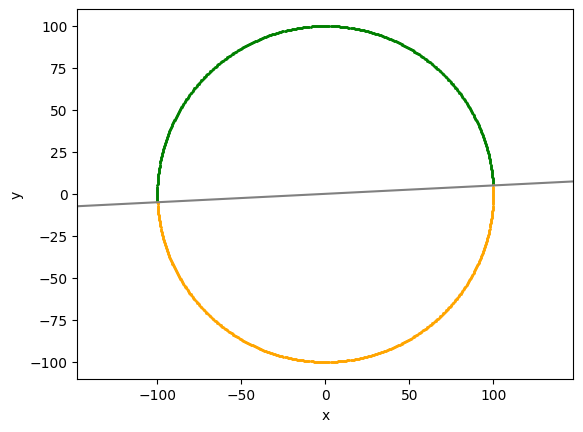

In [494]:
classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right = categorize_points(points_c_float32, a, b, mat_det_3x3, 10 ** -14)
draw_line_equal(classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right)
print(len(points_c_float32),len(classified_points_c_float32_left),len(classified_points_c_float32_mid),len(classified_points_c_float32_right))

1000 499 0 501


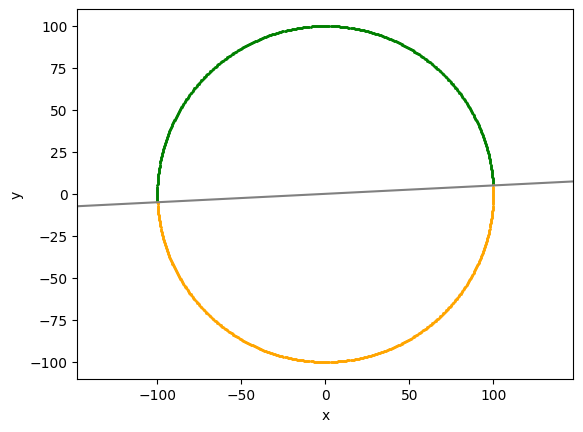

In [495]:
classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right = categorize_points(points_c_float32, a, b, mat_det_3x3_lib, 10 ** -14)
draw_line_equal(classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right)
print(len(points_c_float32),len(classified_points_c_float32_left),len(classified_points_c_float32_mid),len(classified_points_c_float32_right))

1000 499 0 501


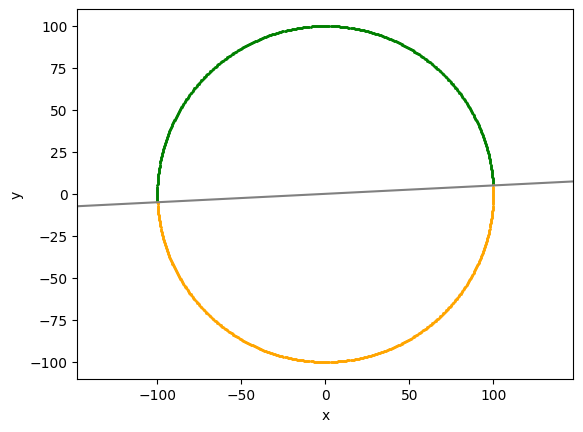

In [496]:
classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right = categorize_points(points_c_float32, a, b, mat_det_2x2, 10 ** -14)
draw_line_equal(classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right)
print(len(points_c_float32),len(classified_points_c_float32_left),len(classified_points_c_float32_mid),len(classified_points_c_float32_right))

1000 499 0 501


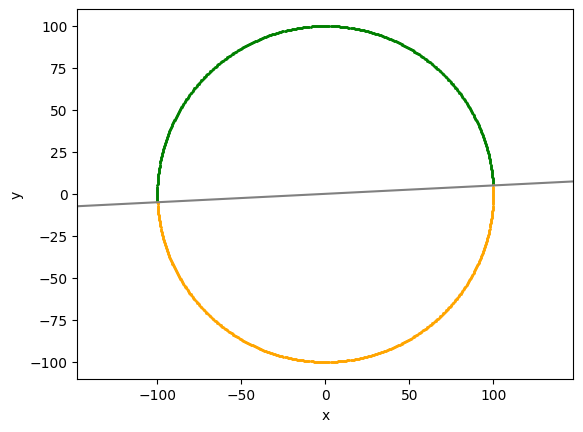

In [497]:
classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right = categorize_points(points_c_float32, a, b, mat_det_2x2_lib, 10 ** -14)
draw_line_equal(classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right)
print(len(points_c_float32),len(classified_points_c_float32_left),len(classified_points_c_float32_mid),len(classified_points_c_float32_right))

$$\epsilon = 10^{-12}$$

1000 499 0 501


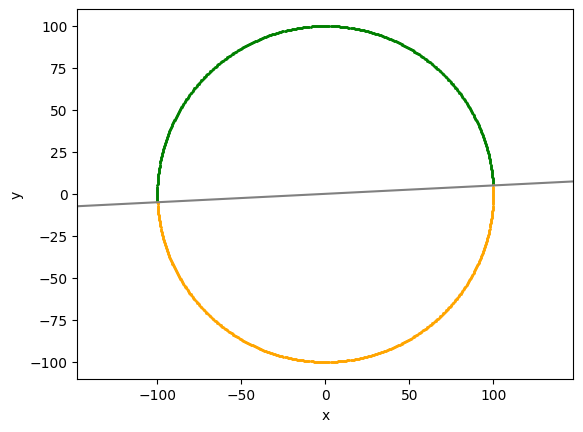

In [498]:
classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right = categorize_points(points_c_float32, a, b, mat_det_3x3, 10 ** -12)
draw_line_equal(classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right)
print(len(points_c_float32),len(classified_points_c_float32_left),len(classified_points_c_float32_mid),len(classified_points_c_float32_right))

1000 499 0 501


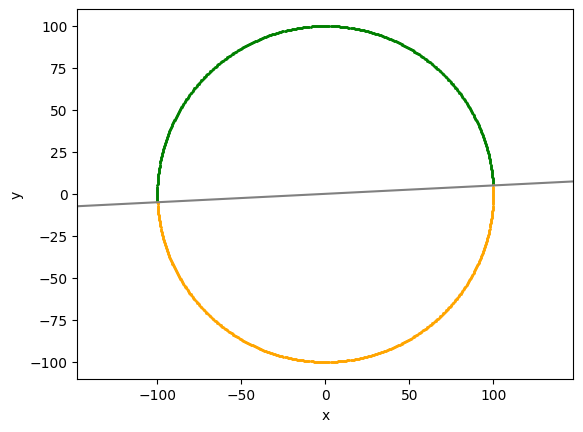

In [499]:
classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right = categorize_points(points_c_float32, a, b, mat_det_3x3_lib, 10 ** -12)
draw_line_equal(classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right)
print(len(points_c_float32),len(classified_points_c_float32_left),len(classified_points_c_float32_mid),len(classified_points_c_float32_right))

1000 499 0 501


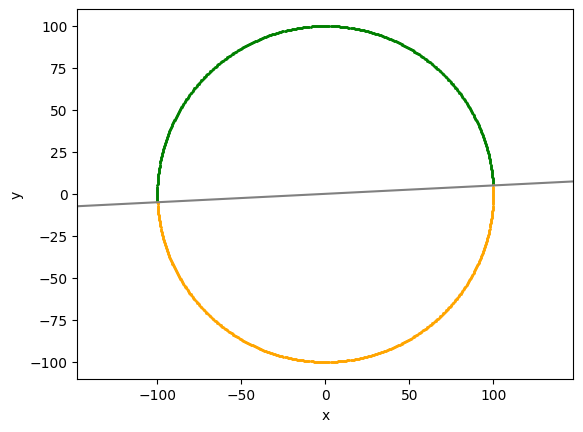

In [500]:
classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right = categorize_points(points_c_float32, a, b, mat_det_2x2, 10 ** -12)
draw_line_equal(classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right)
print(len(points_c_float32),len(classified_points_c_float32_left),len(classified_points_c_float32_mid),len(classified_points_c_float32_right))

1000 499 0 501


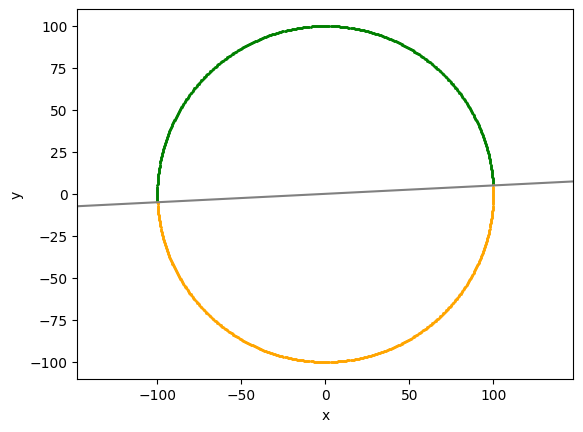

In [501]:
classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right = categorize_points(points_c_float32, a, b, mat_det_2x2_lib, 10 ** -12)
draw_line_equal(classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right)
print(len(points_c_float32),len(classified_points_c_float32_left),len(classified_points_c_float32_mid),len(classified_points_c_float32_right))

$$\epsilon = 10^{-10}$$

1000 499 0 501


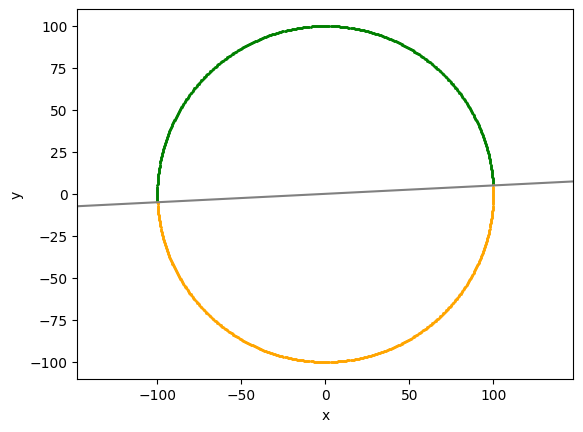

In [502]:
classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right = categorize_points(points_c_float32, a, b, mat_det_3x3, 10 ** -10)
draw_line_equal(classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right)
print(len(points_c_float32),len(classified_points_c_float32_left),len(classified_points_c_float32_mid),len(classified_points_c_float32_right))

1000 499 0 501


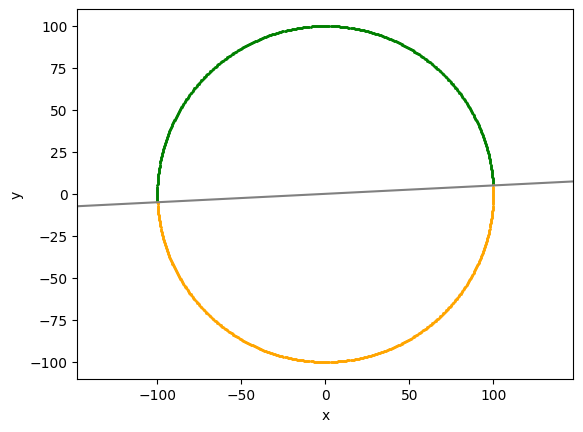

In [503]:
classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right = categorize_points(points_c_float32, a, b, mat_det_3x3_lib, 10 ** -10)
draw_line_equal(classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right)
print(len(points_c_float32),len(classified_points_c_float32_left),len(classified_points_c_float32_mid),len(classified_points_c_float32_right))

1000 499 0 501


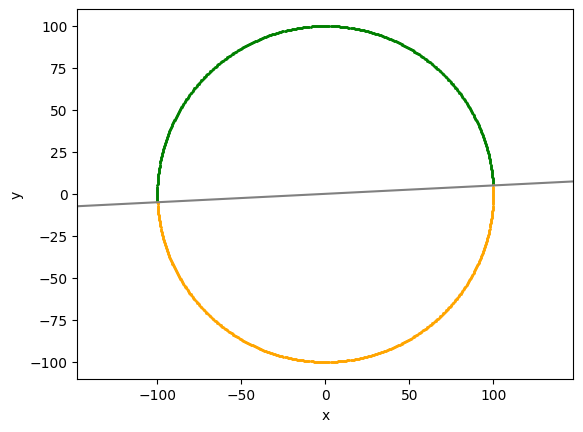

In [504]:
classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right = categorize_points(points_c_float32, a, b, mat_det_2x2, 10 ** -10)
draw_line_equal(classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right)
print(len(points_c_float32),len(classified_points_c_float32_left),len(classified_points_c_float32_mid),len(classified_points_c_float32_right))

1000 499 0 501


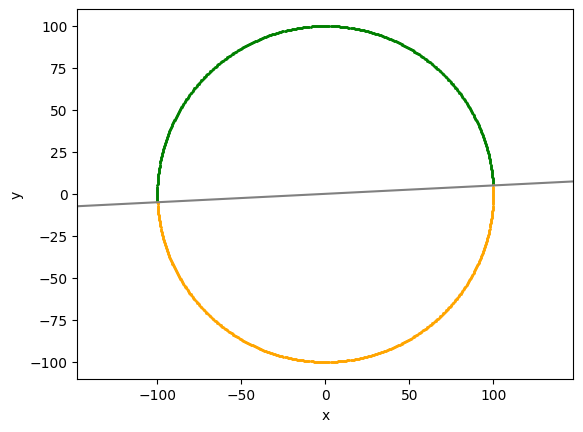

In [505]:
classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right = categorize_points(points_c_float32, a, b, mat_det_2x2_lib, 10 ** -10)
draw_line_equal(classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right)
print(len(points_c_float32),len(classified_points_c_float32_left),len(classified_points_c_float32_mid),len(classified_points_c_float32_right))

$$\epsilon = 10^{-8}$$

1000 499 0 501


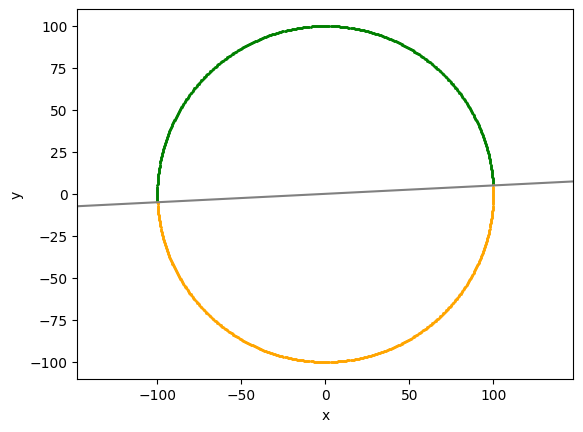

In [506]:
classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right = categorize_points(points_c_float32, a, b, mat_det_3x3, 10 ** -8)
draw_line_equal(classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right)
print(len(points_c_float32),len(classified_points_c_float32_left),len(classified_points_c_float32_mid),len(classified_points_c_float32_right))

1000 499 0 501


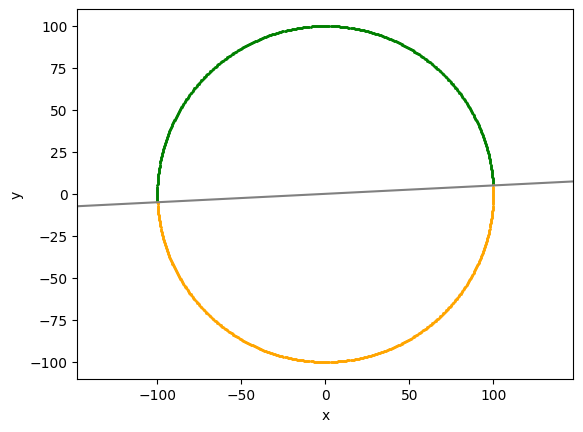

In [507]:
classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right = categorize_points(points_c_float32, a, b, mat_det_3x3_lib, 10 ** -8)
draw_line_equal(classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right)
print(len(points_c_float32),len(classified_points_c_float32_left),len(classified_points_c_float32_mid),len(classified_points_c_float32_right))

1000 499 0 501


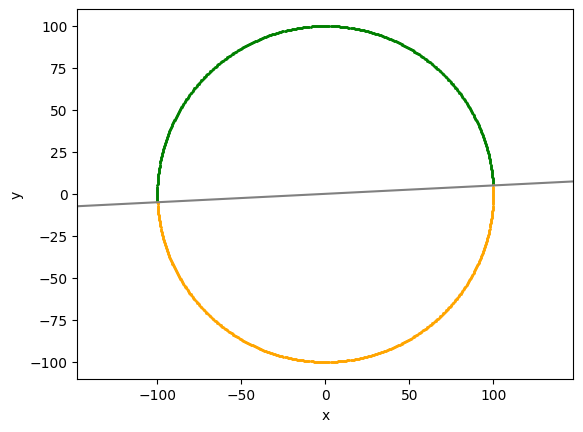

In [508]:
classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right = categorize_points(points_c_float32, a, b, mat_det_2x2, 10 ** -8)
draw_line_equal(classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right)
print(len(points_c_float32),len(classified_points_c_float32_left),len(classified_points_c_float32_mid),len(classified_points_c_float32_right))

1000 499 0 501


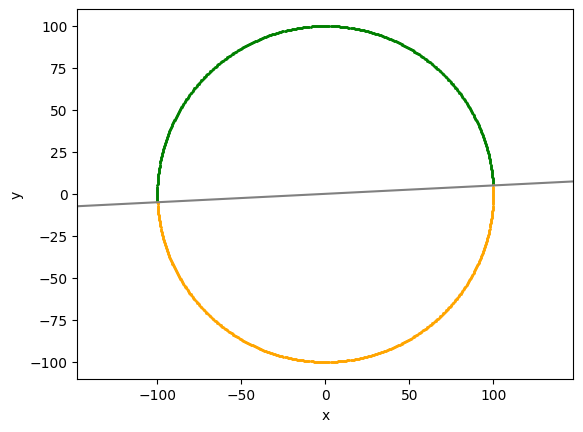

In [509]:
classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right = categorize_points(points_c_float32, a, b, mat_det_2x2_lib, 10 ** -8)
draw_line_equal(classified_points_c_float32_left, classified_points_c_float32_mid, classified_points_c_float32_right)
print(len(points_c_float32),len(classified_points_c_float32_left),len(classified_points_c_float32_mid),len(classified_points_c_float32_right))

ZBIÓR D

$$\epsilon = 0$$

1000 292 396 312


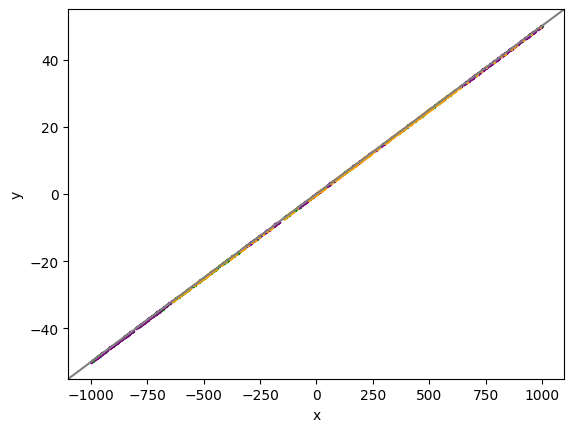

In [510]:
classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right = categorize_points(points_d_float32, a, b, mat_det_3x3, 0)
draw_line(classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right)
print(len(points_d_float32),len(classified_points_d_float32_left),len(classified_points_d_float32_mid),len(classified_points_d_float32_right))

1000 479 57 464


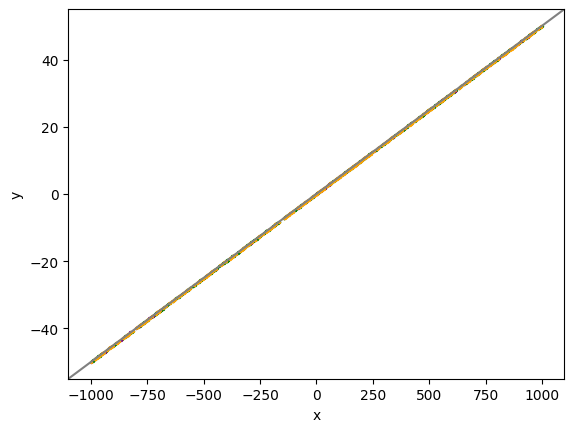

In [511]:
classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right = categorize_points(points_d_float32, a, b, mat_det_3x3_lib, 0)
draw_line(classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right)
print(len(points_d_float32),len(classified_points_d_float32_left),len(classified_points_d_float32_mid),len(classified_points_d_float32_right))

1000 171 658 171


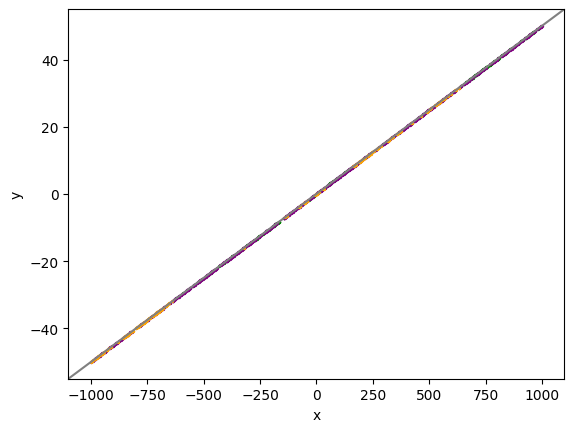

In [512]:
classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right = categorize_points(points_d_float32, a, b, mat_det_2x2, 0)
draw_line(classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right)
print(len(points_d_float32),len(classified_points_d_float32_left),len(classified_points_d_float32_mid),len(classified_points_d_float32_right))

1000 496 0 504


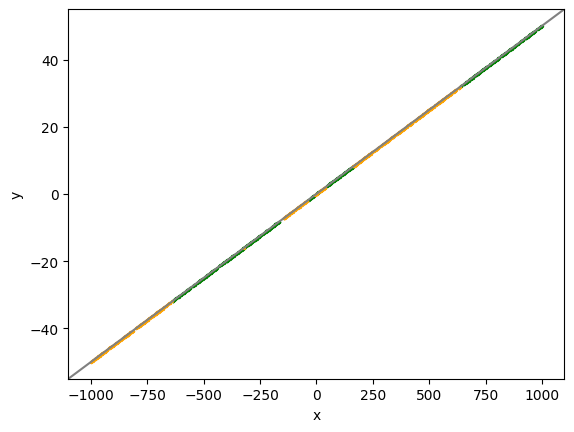

In [513]:
classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right = categorize_points(points_d_float32, a, b, mat_det_2x2_lib, 0)
draw_line(classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right)
print(len(points_d_float32),len(classified_points_d_float32_left),len(classified_points_d_float32_mid),len(classified_points_d_float32_right))

$$\epsilon = 10^{-14}$$

1000 292 396 312


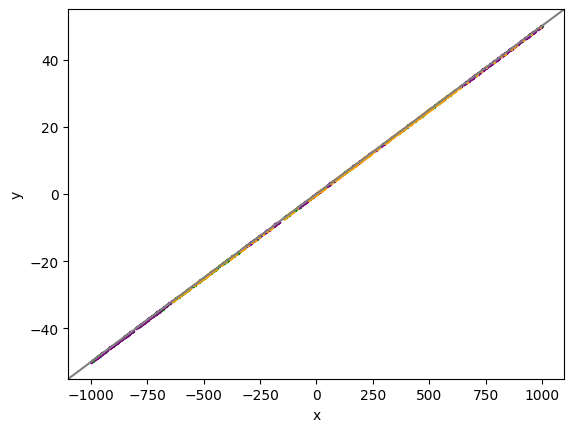

In [514]:
classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right = categorize_points(points_d_float32, a, b, mat_det_3x3, 10 ** -14)
draw_line(classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right)
print(len(points_d_float32),len(classified_points_d_float32_left),len(classified_points_d_float32_mid),len(classified_points_d_float32_right))

1000 421 158 421


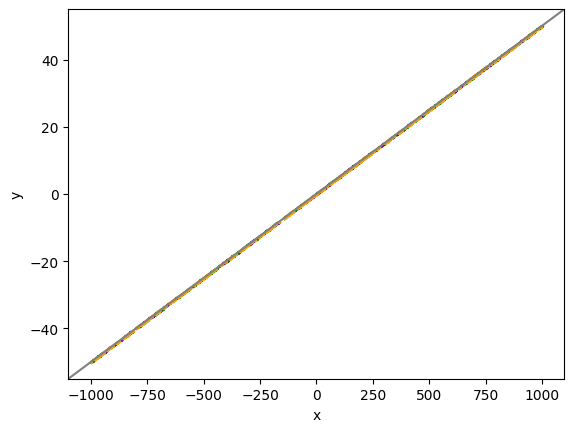

In [515]:
classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right = categorize_points(points_d_float32, a, b, mat_det_3x3_lib, 10 ** -14)
draw_line(classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right)
print(len(points_d_float32),len(classified_points_d_float32_left),len(classified_points_d_float32_mid),len(classified_points_d_float32_right))

1000 171 658 171


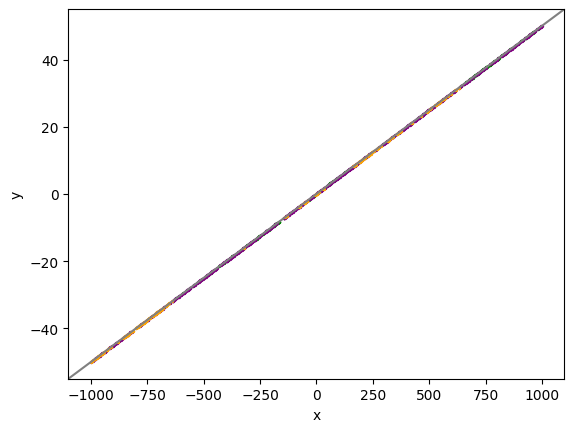

In [516]:
classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right = categorize_points(points_d_float32, a, b, mat_det_2x2, 10 ** -14)
draw_line(classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right)
print(len(points_d_float32),len(classified_points_d_float32_left),len(classified_points_d_float32_mid),len(classified_points_d_float32_right))

1000 496 0 504


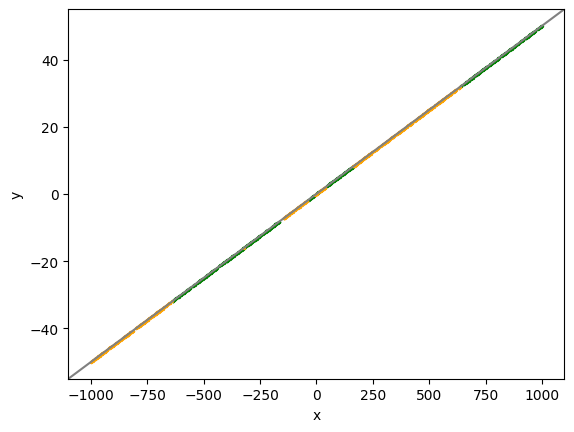

In [517]:
classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right = categorize_points(points_d_float32, a, b, mat_det_2x2_lib, 10 ** -14)
draw_line(classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right)
print(len(points_d_float32),len(classified_points_d_float32_left),len(classified_points_d_float32_mid),len(classified_points_d_float32_right))

$$\epsilon = 10^{-12}$$

1000 292 396 312


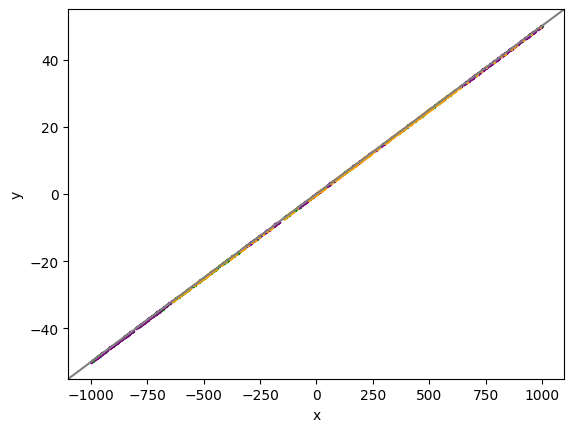

In [518]:
classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right = categorize_points(points_d_float32, a, b, mat_det_3x3, 10 ** -12)
draw_line(classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right)
print(len(points_d_float32),len(classified_points_d_float32_left),len(classified_points_d_float32_mid),len(classified_points_d_float32_right))

1000 414 174 412


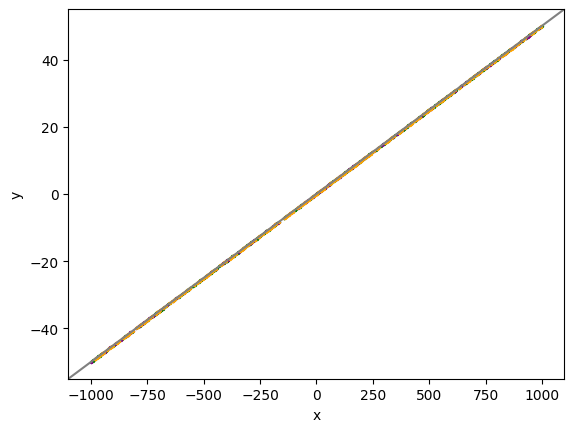

In [519]:
classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right = categorize_points(points_d_float32, a, b, mat_det_3x3_lib, 10 ** -12)
draw_line(classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right)
print(len(points_d_float32),len(classified_points_d_float32_left),len(classified_points_d_float32_mid),len(classified_points_d_float32_right))

1000 171 658 171


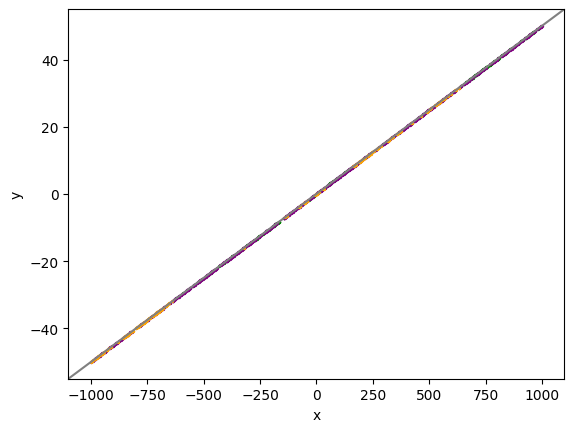

In [520]:
classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right = categorize_points(points_d_float32, a, b, mat_det_2x2, 10 ** -12)
draw_line(classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right)
print(len(points_d_float32),len(classified_points_d_float32_left),len(classified_points_d_float32_mid),len(classified_points_d_float32_right))

1000 496 0 504


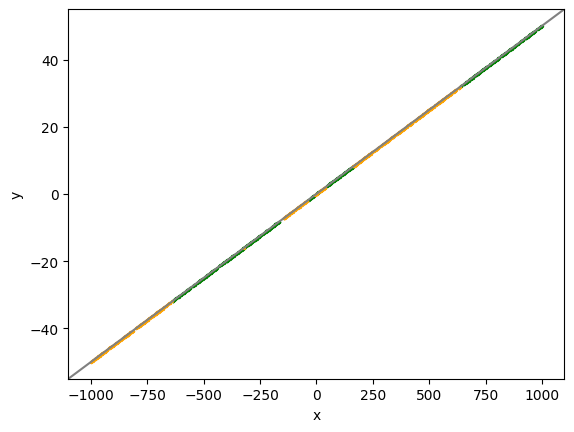

In [521]:
classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right = categorize_points(points_d_float32, a, b, mat_det_2x2_lib, 10 ** -12)
draw_line(classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right)
print(len(points_d_float32),len(classified_points_d_float32_left),len(classified_points_d_float32_mid),len(classified_points_d_float32_right))

$$\epsilon = 10^{-10}$$

1000 292 396 312


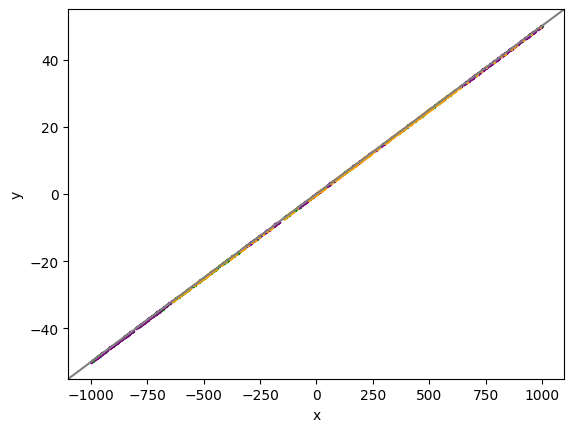

In [522]:
classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right = categorize_points(points_d_float32, a, b, mat_det_3x3, 10 ** -10)
draw_line(classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right)
print(len(points_d_float32),len(classified_points_d_float32_left),len(classified_points_d_float32_mid),len(classified_points_d_float32_right))

1000 414 174 412


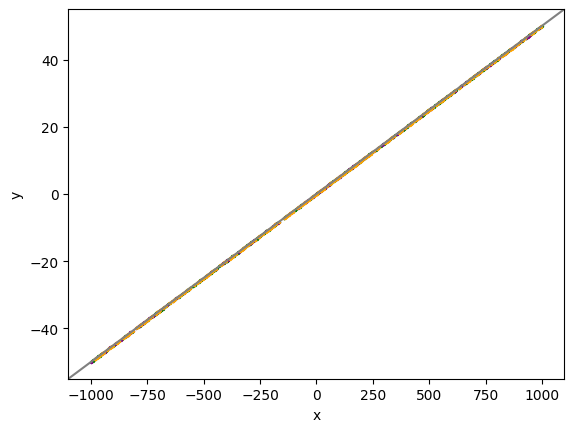

In [523]:
classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right = categorize_points(points_d_float32, a, b, mat_det_3x3_lib, 10 ** -10)
draw_line(classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right)
print(len(points_d_float32),len(classified_points_d_float32_left),len(classified_points_d_float32_mid),len(classified_points_d_float32_right))

1000 171 658 171


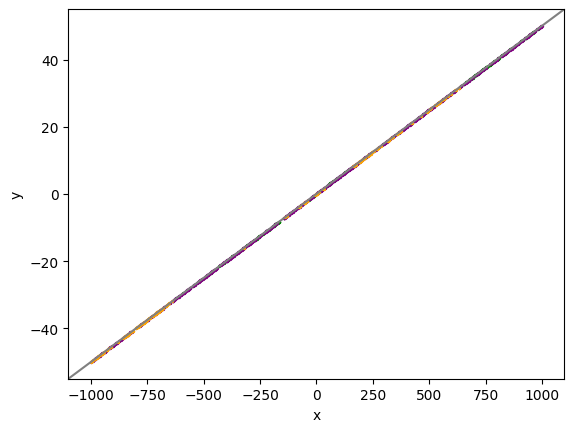

In [524]:
classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right = categorize_points(points_d_float32, a, b, mat_det_2x2, 10 ** -10)
draw_line(classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right)
print(len(points_d_float32),len(classified_points_d_float32_left),len(classified_points_d_float32_mid),len(classified_points_d_float32_right))

1000 496 0 504


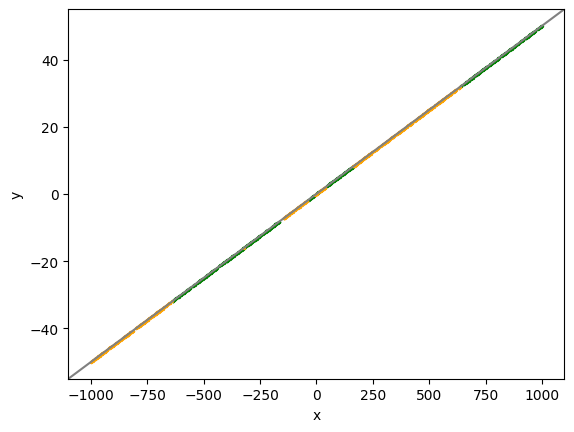

In [525]:
classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right = categorize_points(points_d_float32, a, b, mat_det_2x2_lib, 10 ** -10)
draw_line(classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right)
print(len(points_d_float32),len(classified_points_d_float32_left),len(classified_points_d_float32_mid),len(classified_points_d_float32_right))

$$\epsilon = 10^{-8}$$

1000 291 398 311


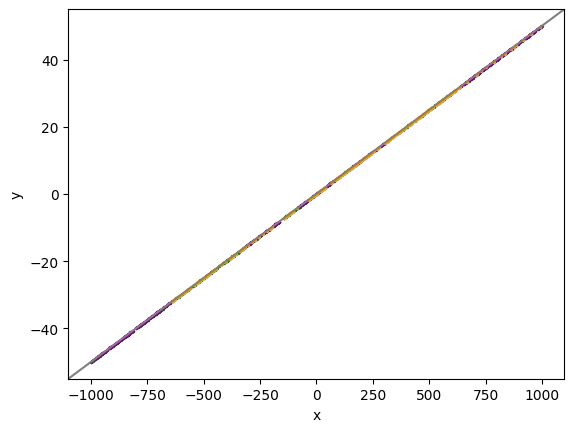

In [526]:
classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right = categorize_points(points_d_float32, a, b, mat_det_3x3, 10 ** -8)
draw_line(classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right)
print(len(points_d_float32),len(classified_points_d_float32_left),len(classified_points_d_float32_mid),len(classified_points_d_float32_right))

1000 413 179 408


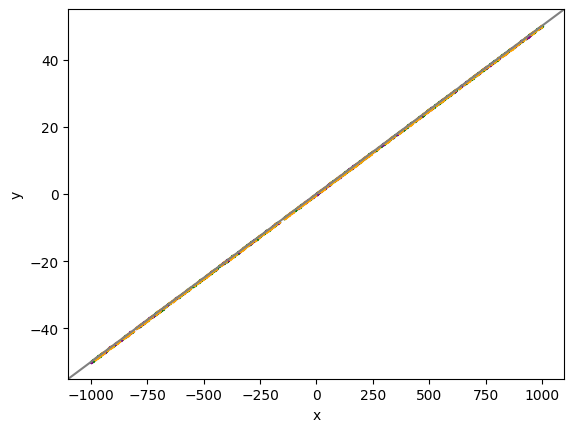

In [527]:
classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right = categorize_points(points_d_float32, a, b, mat_det_3x3_lib, 10 ** -8)
draw_line(classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right)
print(len(points_d_float32),len(classified_points_d_float32_left),len(classified_points_d_float32_mid),len(classified_points_d_float32_right))

1000 171 661 168


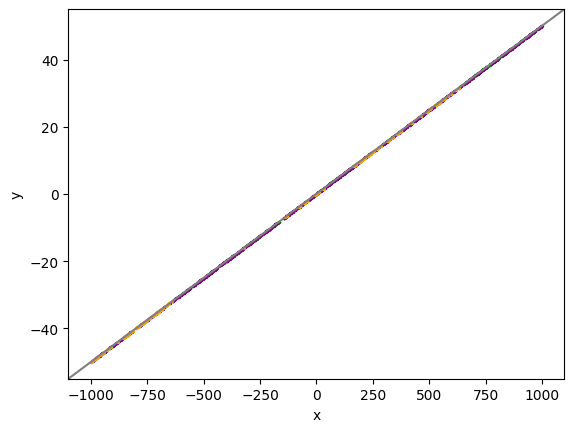

In [528]:
classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right = categorize_points(points_d_float32, a, b, mat_det_2x2, 10 ** -8)
draw_line(classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right)
print(len(points_d_float32),len(classified_points_d_float32_left),len(classified_points_d_float32_mid),len(classified_points_d_float32_right))

1000 494 6 500


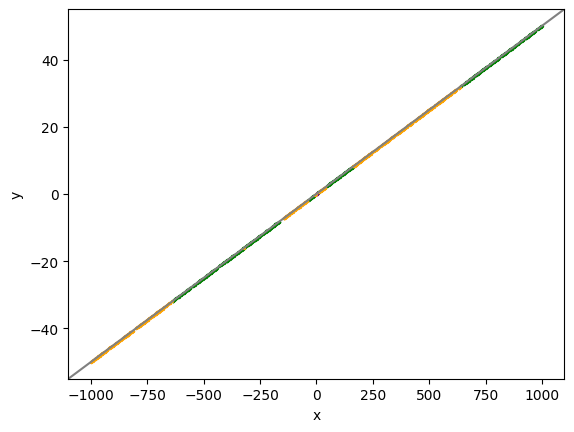

In [187]:
classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right = categorize_points(points_d_float32, a, b, mat_det_2x2_lib, 10 ** -8)
draw_line(classified_points_d_float32_left, classified_points_d_float32_mid, classified_points_d_float32_right)
print(len(points_d_float32),len(classified_points_d_float32_left),len(classified_points_d_float32_mid),len(classified_points_d_float32_right))